# Data preparation

First we have a look at the different datasets. With an explorative data analysis we get a overview over the datasets and its quality. For every dataframe there is first a section of coding and at the end a brief summary with the most important findings. 

In [69]:
# Loading libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticker
import seaborn as sns
from datetime import timedelta
from prettytable import PrettyTable
from scipy.stats import linregress
from my_functions import HelperFunctions

myFunctions = HelperFunctions()

## 1. Loading, Transforming, and Checking Data Quality via EDA


In [70]:
# Load datasets
account = pd.read_csv('Data/account.csv', delimiter=';')
card = pd.read_csv('Data/card.csv', delimiter=';')
client = pd.read_csv('Data/client.csv', delimiter=';')
disp = pd.read_csv('Data/disp.csv', delimiter=';')
district = pd.read_csv('Data/district.csv', delimiter=';')
loan = pd.read_csv('Data/loan.csv', delimiter=';')
order = pd.read_csv('Data/order.csv', delimiter=';')
trans = pd.read_csv('Data/trans.csv', delimiter=';')

C:\Users\chant\AppData\Local\Temp/ipykernel_2836/3631285392.py:9: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  trans = pd.read_csv('Data/trans.csv', delimiter=';')


### Account

In [71]:
# Getting an overview
print(account.shape)
print(account.head())

account['date'] = pd.to_datetime(account['date'], format='%y%m%d')
account['frequency'].value_counts()

(4500, 4)
   account_id  district_id         frequency    date
0         576           55  POPLATEK MESICNE  930101
1        3818           74  POPLATEK MESICNE  930101
2         704           55  POPLATEK MESICNE  930101
3        2378           16  POPLATEK MESICNE  930101
4        2632           24  POPLATEK MESICNE  930102


POPLATEK MESICNE      4167
POPLATEK TYDNE         240
POPLATEK PO OBRATU      93
Name: frequency, dtype: int64

In [72]:
# Translating the frequency into English
translation_frequency = {
    'POPLATEK MESICNE': 'monthly',
    'POPLATEK TYDNE': 'weekly',
    'POPLATEK PO TRANSAKCI': 'after transaction'
}

account['frequency'] = account['frequency'].map(translation_frequency)
account.head()

,account_id,district_id,frequency,date
0,576,55,monthly,1993-01-01
1,3818,74,monthly,1993-01-01
2,704,55,monthly,1993-01-01
3,2378,16,monthly,1993-01-01
4,2632,24,monthly,1993-01-02


### Clients

In [73]:
# Getting an overview
print(client.shape)
print(client.head())

(5369, 3)
   client_id  birth_number  district_id
0          1        706213           18
1          2        450204            1
2          3        406009            1
3          4        561201            5
4          5        605703            5


In [74]:
client = myFunctions.calculate_birthday(client)

print(client[['birth_date', 'age', 'gender']].head())

  birth_date  age  gender
0 1970-12-13   29  female
1 1945-02-04   54    male
2 1940-10-09   59  female
3 1956-12-01   43    male
4 1960-07-03   39  female


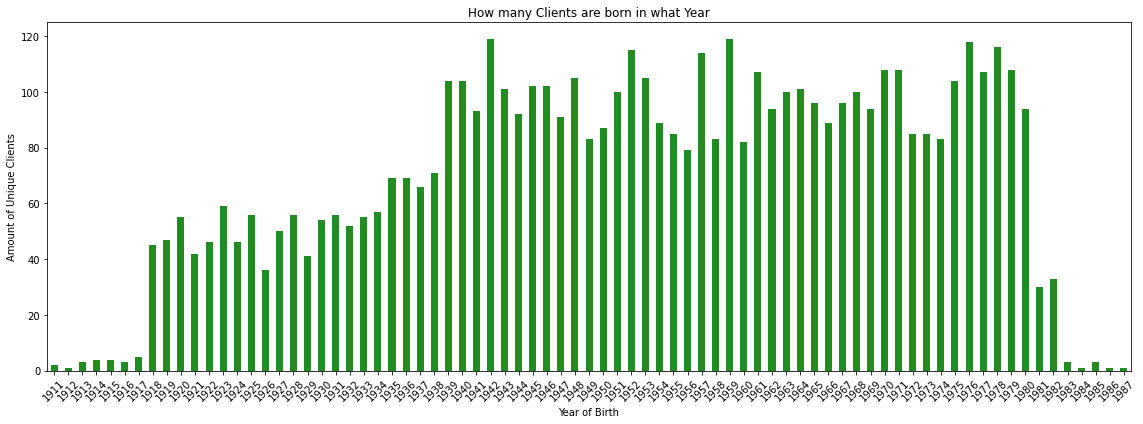

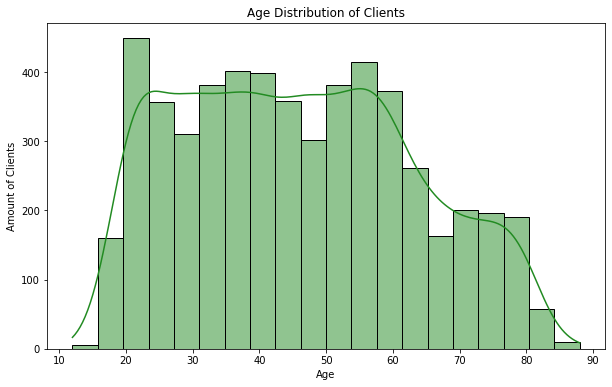

In [75]:
# Visualising the age distribution of the clients and the age distribution
myFunctions.plot_distribiution_of_age(client)

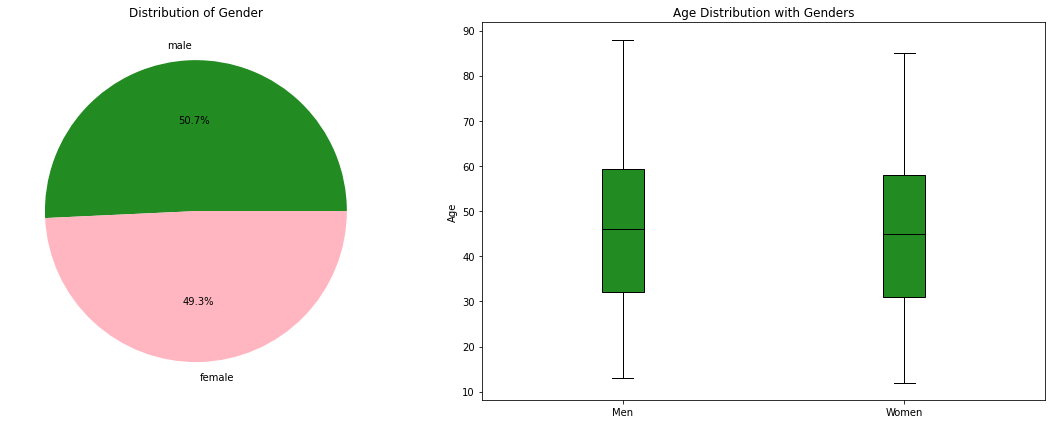

In [76]:
# Having a look at the gender distribution
myFunctions.plot_gender_distribiution(client)

Short summary of what we did: 
In this step we added a column for the birthday-date of the costumers and the gender of the costumers. There is a plot which shows in what year how many costumers were born. Also we can see that the gender distribution is equal. We also see that most costumers come from the district Prague which isn't surprising since it's the biggest city in Czech Republic. 

### District

In [77]:
district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [78]:
# Renaming the columns
new_column_names = ['district_id', 'district_name', 'region', 'inhabitants', 'villages_less_499', 'villages_500_to_1999', 'villages_2000_to_9999', 'villages_with_more_10000', 'number_of_cities', 'ratio_urban_inhabitants', 
                    'average_salary','unemployment_rate_95', 'unemployment_rate_96', 'entrepreneurs_per_1000_inhabitants', 'committed_crimes_95', 'committed_crimes_96']

district.columns = new_column_names

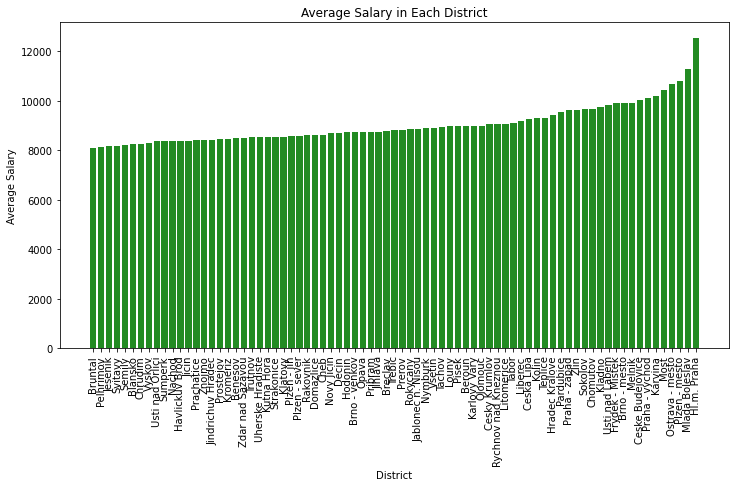

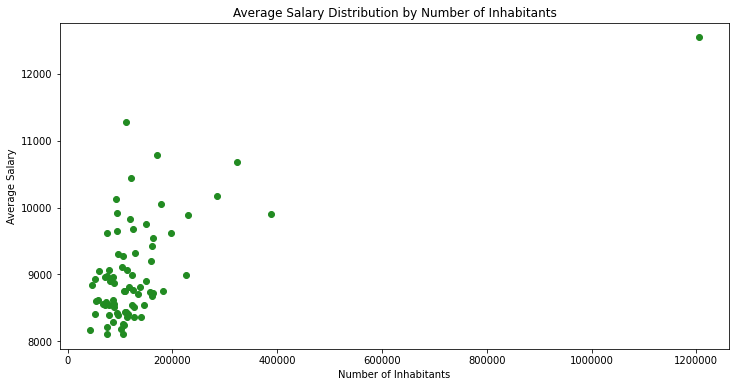

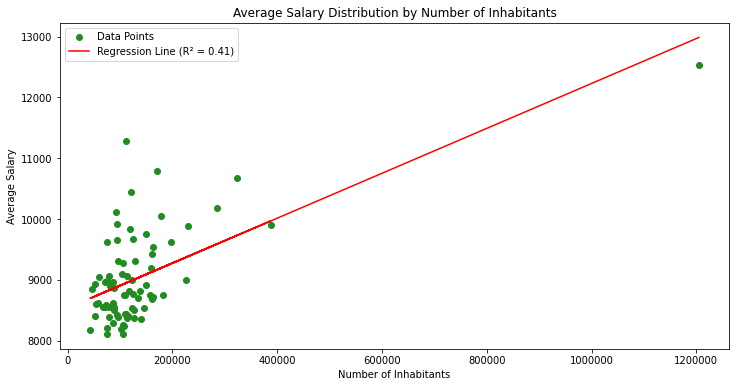

In [79]:
# What is the average salary in each district
# Average salary depending for every district depending on the amount of inhabitants

myFunctions.plot_average_salary_distribiution(district)

That one dot might be an outliner. So let's check if there are more outliners and see if the R2 improves if we ignore them. 

In [80]:
# Stats
x = district['inhabitants']
y = district['average_salary']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

median_salary = np.median(y)
average_salary = np.mean(y)
min_salary = np.min(y)
max_salary = np.max(y)

print("Statistics for Average Salary:")
print(f"Median Salary: {median_salary:.2f}")
print(f"Average Salary: {average_salary:.2f}")
print(f"Minimum Salary: {min_salary:.2f}")
print(f"Maximum Salary: {max_salary:.2f}")
print(f"R² (Coefficient of Determination): {r_value**2:.2f}")

Statistics for Average Salary:
Median Salary: 8814.00
Average Salary: 9031.68
Minimum Salary: 8110.00
Maximum Salary: 12541.00
R² (Coefficient of Determination): 0.41


In [81]:
# Identifying outliners
data = district['average_salary']

Q1 = np.percentile(data, 25)  
Q3 = np.percentile(data, 75)  
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data < lower_bound) | (data > upper_bound)]
print("Outliers:")
print(outliers)

Outliers:
73    10673
25    10787
7     11277
0     12541
Name: average_salary, dtype: int64


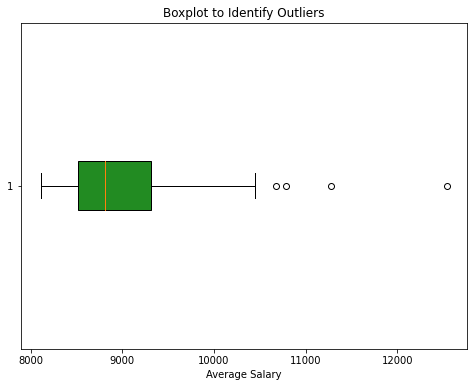

In [82]:
# Boxplot to identify outliers
plt.figure(figsize=(8, 6))
plt.boxplot(data, vert=False, patch_artist=True, boxprops=dict(facecolor='forestgreen', color='black'))
plt.title("Boxplot to Identify Outliers")
plt.xlabel("Average Salary")
plt.show()

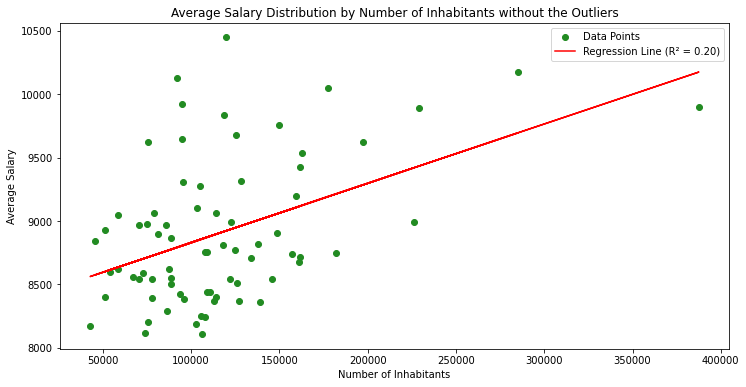

R²: 0.20


In [83]:
# Plot without the outliners
data = district['average_salary']
inhabitants = district['inhabitants']

Q1 = np.percentile(data, 25)  
Q3 = np.percentile(data, 75) 
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = district[(data >= lower_bound) & (data <= upper_bound)]

x = filtered_data['inhabitants']
y = filtered_data['average_salary']

slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='forestgreen', label='Data Points')
plt.plot(x, regression_line, color='red', label=f'Regression Line (R² = {r_value**2:.2f})')
plt.xlabel("Number of Inhabitants")
plt.ylabel("Average Salary")
plt.title("Average Salary Distribution by Number of Inhabitants without the Outliers")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.ScalarFormatter(useOffset=False))
plt.ticklabel_format(style='plain', axis='x') 
plt.legend()
plt.show()
print(f"R²: {r_value**2:.2f}")

Hm, the R**2 got worse. Let's analyse the outliners. 

In [84]:
outliers = district[(data < lower_bound) | (data > upper_bound)]
print(outliers)

    district_id    district_name           region  inhabitants  \
73           74  Ostrava - mesto    north Moravia       323870   
25           26    Plzen - mesto     west Bohemia       170449   
7             8   Mlada Boleslav  central Bohemia       112065   
0             1      Hl.m. Praha           Prague      1204953   

    villages_less_499  villages_500_to_1999  villages_2000_to_9999  \
73                  0                     0                      0   
25                  0                     0                      0   
7                  95                    19                      7   
0                   0                     0                      0   

    villages_with_more_10000  number_of_cities  ratio_urban_inhabitants  \
73                         1                 1                    100.0   
25                         1                 1                    100.0   
7                          1                 8                     69.4   
0                 

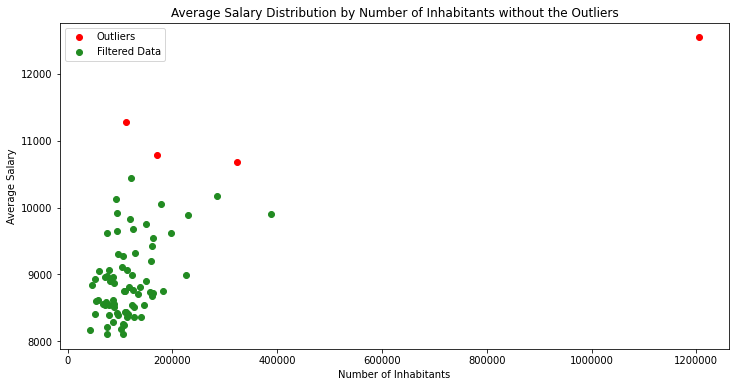

In [85]:
# Marking the outliners
plt.figure(figsize=(12, 6))
plt.scatter(outliers['inhabitants'], outliers['average_salary'], color='red', label='Outliers')
plt.scatter(filtered_data['inhabitants'], filtered_data['average_salary'], color='forestgreen', label='Filtered Data')
plt.xlabel("Number of Inhabitants")
plt.ylabel("Average Salary")
plt.title("Average Salary Distribution by Number of Inhabitants without the Outliers")
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='x')  # Ensures plain formatting for x-axis

plt.legend()
plt.show()

Mean of Residuals: -0.00
Standard Deviation of Residuals: 502.49


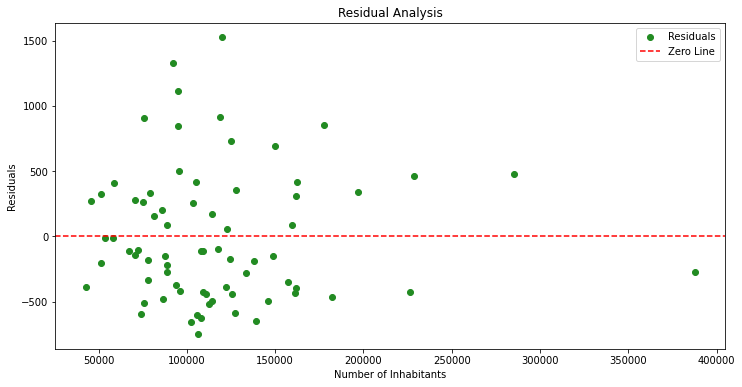

In [86]:
# Calculating the residuals
x = filtered_data['inhabitants']
y = filtered_data['average_salary']

slope, intercept, _, _, _ = linregress(x, y)
y_pred = slope * x + intercept  
residuals = y - y_pred

print(f"Mean of Residuals: {np.mean(residuals):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals):.2f}")

plt.figure(figsize=(12, 6))
plt.scatter(x, residuals, color='forestgreen', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line') 
plt.xlabel("Number of Inhabitants")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.legend()
plt.show()

There is a greater scatter for smaller x-values, that means that there is no systematic error. 

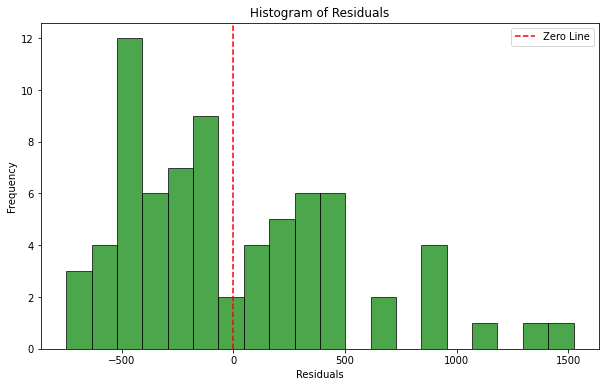

In [87]:
# Histogram for the residuals
myFunctions.plot_hostogram_residuals(residuals)

Conclusion: There are some outliers, we need to keep that in mind for the model. 

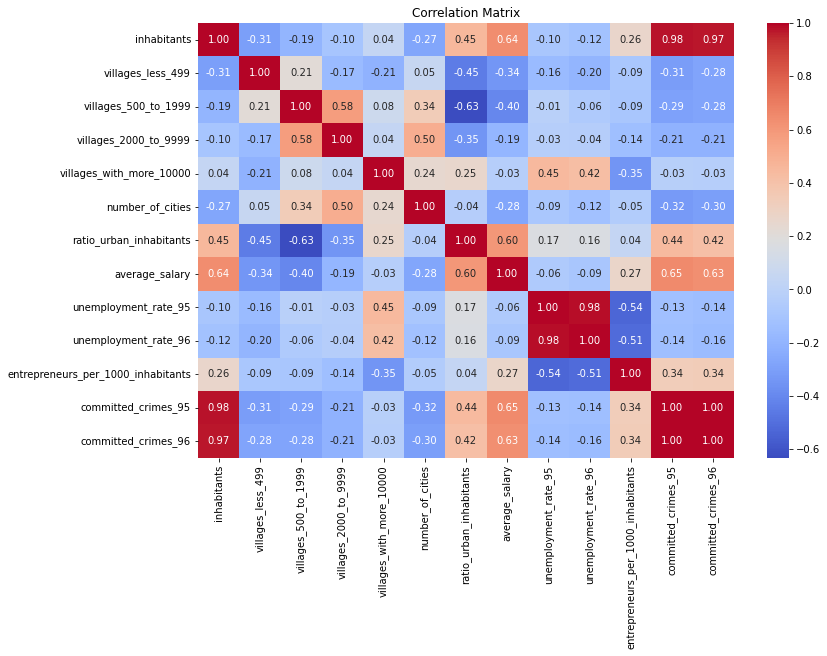

In [88]:
# Correlation matrix
numeric_columns = ['inhabitants', 'villages_less_499', 'villages_500_to_1999', 'villages_2000_to_9999', 
                   'villages_with_more_10000', 'number_of_cities', 'ratio_urban_inhabitants', 
                   'average_salary', 'unemployment_rate_95', 'unemployment_rate_96', 
                   'entrepreneurs_per_1000_inhabitants', 'committed_crimes_95', 'committed_crimes_96']

district[numeric_columns] = district[numeric_columns].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(12, 8))
correlation_matrix = district[['inhabitants', 'villages_less_499', 'villages_500_to_1999', 'villages_2000_to_9999', 'villages_with_more_10000', 'number_of_cities', 'ratio_urban_inhabitants', 
                    'average_salary','unemployment_rate_95', 'unemployment_rate_96', 'entrepreneurs_per_1000_inhabitants', 'committed_crimes_95', 'committed_crimes_96']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

c:\Users\chant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\chant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\chant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\chant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated i

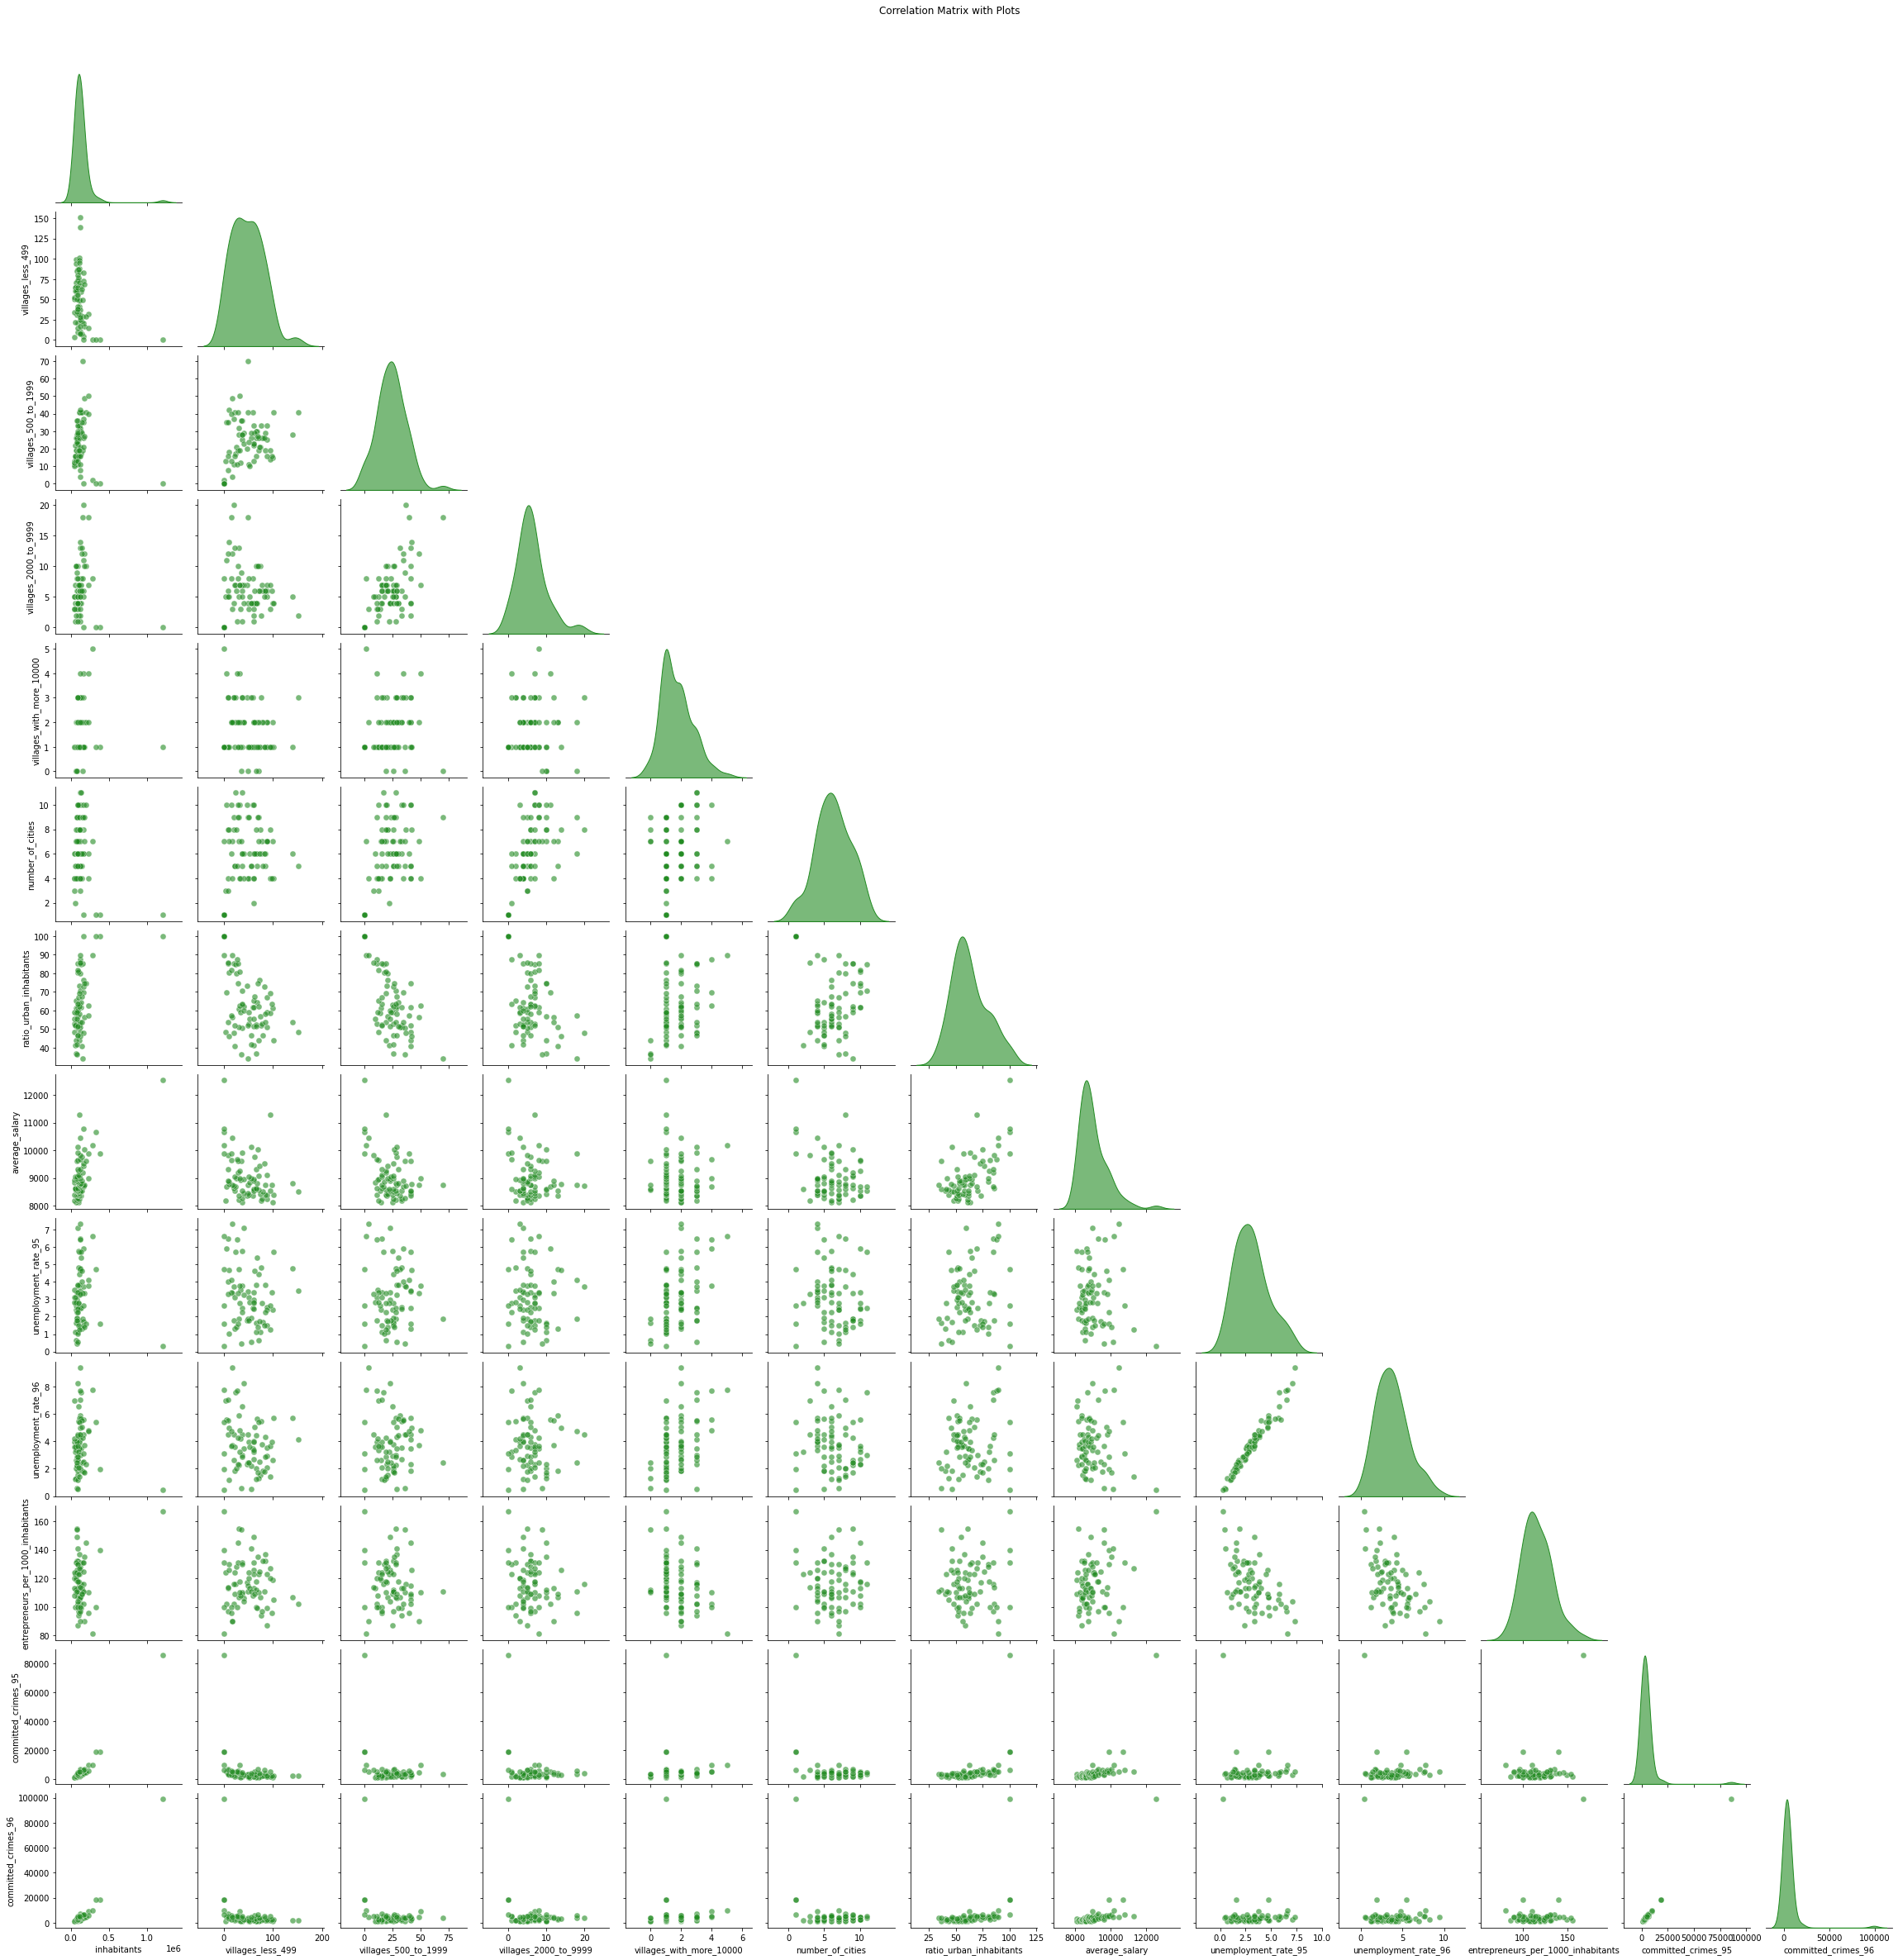

In [89]:
# Different correlation matrix
columns = ['inhabitants', 'villages_less_499', 'villages_500_to_1999', 'villages_2000_to_9999', 
           'villages_with_more_10000', 'number_of_cities', 'ratio_urban_inhabitants', 
           'average_salary', 'unemployment_rate_95', 'unemployment_rate_96', 
           'entrepreneurs_per_1000_inhabitants', 'committed_crimes_95', 'committed_crimes_96']

# Plot
sns.pairplot(district[columns], diag_kind='kde', corner=True,
             plot_kws={'alpha': 0.6, 's': 50, 'color': 'forestgreen'},  
             diag_kws={'shade': True, 'alpha': 0.6, 'color': 'forestgreen'}) 
plt.suptitle("Correlation Matrix with Plots", y=1.02)  
plt.show()

### Dispositions

In [90]:
# Getting an overview
print(disp.shape)
print(disp.head())

# See how many types there are and the amount of each
disp['type'].value_counts()

(5369, 4)
   disp_id  client_id  account_id       type
0        1          1           1      OWNER
1        2          2           2      OWNER
2        3          3           2  DISPONENT
3        4          4           3      OWNER
4        5          5           3  DISPONENT


OWNER        4500
DISPONENT     869
Name: type, dtype: int64

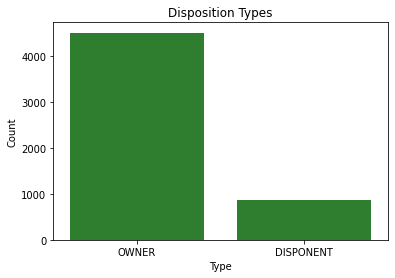

In [91]:
# See how many are owners and how many are disponents
myFunctions.plot_disposition_type(disp)

In [92]:
# Checking if one account can have more than one client

multiple_clients_per_account = disp.groupby(['account_id'])['client_id'].nunique().reset_index(name='unique_clients')
multiple_clients_per_account = multiple_clients_per_account[multiple_clients_per_account['unique_clients'] > 1]
print(multiple_clients_per_account['unique_clients'].value_counts())

2    869
Name: unique_clients, dtype: int64


In [93]:
# Checking if one client has more than one account
multiple_accounts_per_client = disp.groupby('client_id')['account_id'].nunique().reset_index(name='unique_accounts')
multiple_accounts_per_client = multiple_accounts_per_client[multiple_accounts_per_client['unique_accounts'] > 1]
print(multiple_accounts_per_client)

Empty DataFrame
Columns: [client_id, unique_accounts]
Index: []


Some accounts have two unique clients (with unique client IDs) so some of them have an owner and a disponent. But no client has more than one account. 

### Transactions

In [94]:
# Getting an overview
print(trans.shape)
print(trans.head())
print(trans.isnull().sum())

(1056320, 10)
   trans_id  account_id    date    type operation  amount  balance k_symbol  \
0    695247        2378  930101  PRIJEM     VKLAD   700.0    700.0      NaN   
1    171812         576  930101  PRIJEM     VKLAD   900.0    900.0      NaN   
2    207264         704  930101  PRIJEM     VKLAD  1000.0   1000.0      NaN   
3   1117247        3818  930101  PRIJEM     VKLAD   600.0    600.0      NaN   
4    579373        1972  930102  PRIJEM     VKLAD   400.0    400.0      NaN   

  bank  account  
0  NaN      NaN  
1  NaN      NaN  
2  NaN      NaN  
3  NaN      NaN  
4  NaN      NaN  
trans_id           0
account_id         0
date               0
type               0
operation     183114
amount             0
balance            0
k_symbol      481881
bank          782812
account       760931
dtype: int64


In [95]:
# Fix the the format in date and see how many there are of each 
trans['date'] = pd.to_datetime(trans['date'], format='%y%m%d')
trans['type'].value_counts()

VYDAJ     634571
PRIJEM    405083
VYBER      16666
Name: type, dtype: int64

In [96]:
# Renaming column operation into English
translations = {
    "VYBER KARTOU": "credit_card_withdrawal",
    "VKLAD": "credit_in_cash",
    "PREVOD Z UCTU": "collection_from_other_bank",
    "VYBER": "withdrawal_cash",
    "PREVOD NA UCET": "remittance_to_other_bank"
}

trans['operation'] = trans['operation'].map(translations)

# Renaming column type into English
translations = {
    "PRIJEM": "credit",
    "VYDAJ": "withdrawal"
}

trans['type'] = trans['type'].map(translations)

# Renaming column k-symbol into English. Service is defined as hairdresser or other services. Sanction interest is only if the balance is negative.
translations = {
    "POJISTNE": "insurrance_payment",
    "SLUZBY": "service", 
    "UROK":"interest_credited",
    "SANKC. UROK": "sanction_interest",
    "SIPO": "household",
    "DUCHOD": "pension",
    "UVER": "loan_payment"
}

trans['k_symbol'] = trans['k_symbol'].map(translations)

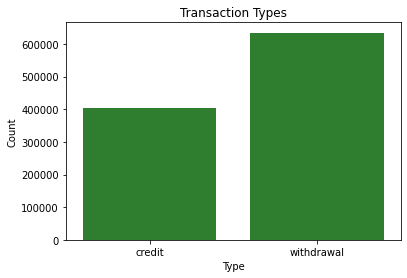

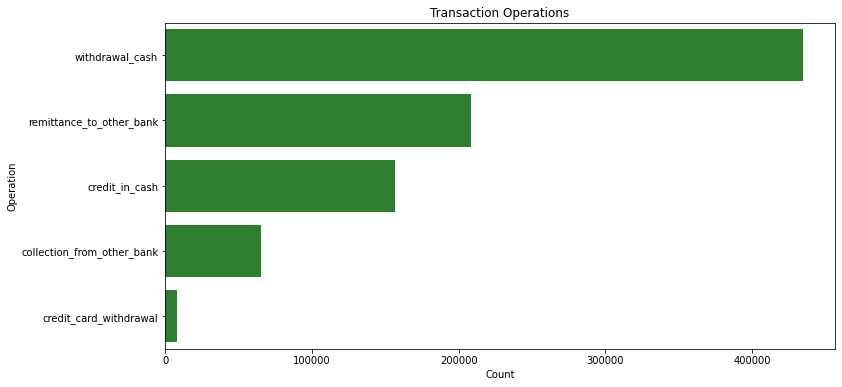

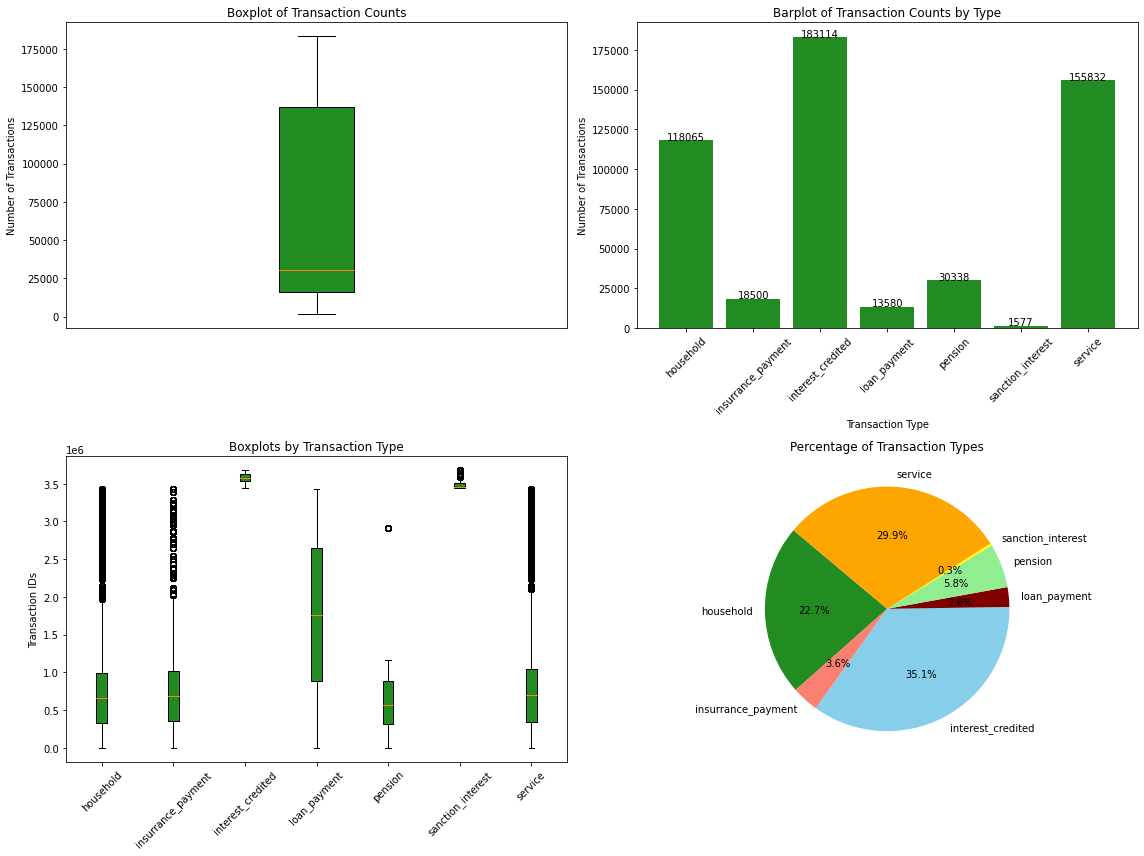

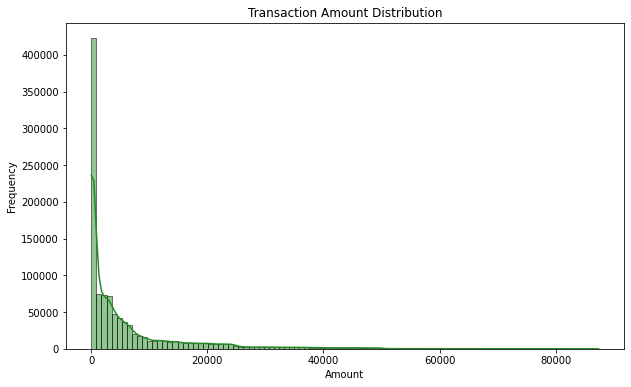

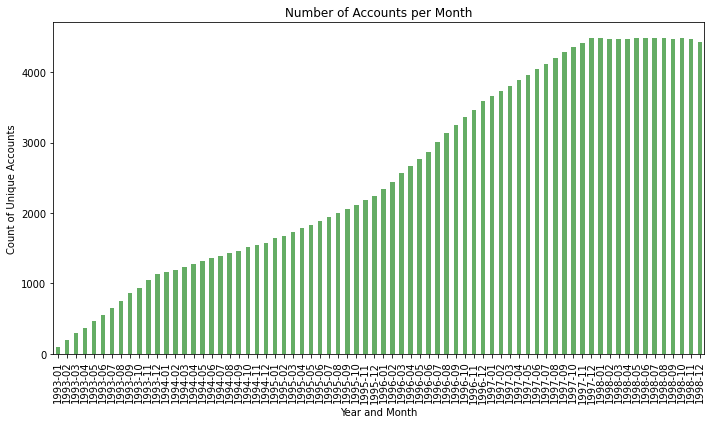

In [97]:
# Renaming k-symbol into transaction_type
trans = trans.rename(columns={'k_symbol': 'transaction_type'})

myFunctions.plot_transaction_info(trans)

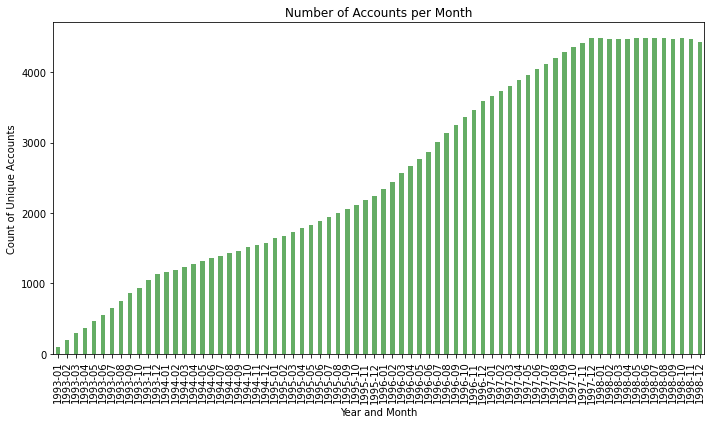

In [98]:
# When was the first transaction meaning when did the clients open their account?
trans['first_transaction_year_month'] = trans['date'].dt.to_period('M')
accounts_per_month = trans.groupby('first_transaction_year_month')['account_id'].nunique()

# Plot
plt.figure(figsize=(10, 6))
accounts_per_month.plot(kind='bar', color='forestgreen', alpha=0.7)
plt.title('Number of Accounts per Month')
plt.xlabel('Year and Month')
plt.ylabel('Count of Unique Accounts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Loan

In [99]:
# Getting an overview
print(loan.shape)
print(loan.info())
loan.head()

# Correcting the format and see the types of status
loan['date'] = pd.to_datetime(loan['date'], format='%y%m%d')
loan['status'].value_counts()

(682, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loan_id     682 non-null    int64  
 1   account_id  682 non-null    int64  
 2   date        682 non-null    int64  
 3   amount      682 non-null    int64  
 4   duration    682 non-null    int64  
 5   payments    682 non-null    float64
 6   status      682 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 37.4+ KB
None


C    403
A    203
D     45
B     31
Name: status, dtype: int64

In [100]:
# Changing payment status into words
status_mapping = {
    'A': 'contract finished, no problems',
    'B': 'contract finished, loan not payed',
    'C': 'running contract, OK so far',
    'D': 'running contract, client in debt'
}

loan['status'] = loan['status'].map(status_mapping)
loan.head

<bound method NDFrame.head of      loan_id  account_id       date  amount  duration  payments  \
0       5314        1787 1993-07-05   96396        12    8033.0   
1       5316        1801 1993-07-11  165960        36    4610.0   
2       6863        9188 1993-07-28  127080        60    2118.0   
3       5325        1843 1993-08-03  105804        36    2939.0   
4       7240       11013 1993-09-06  274740        60    4579.0   
..       ...         ...        ...     ...       ...       ...   
677     4989         105 1998-12-05  352704        48    7348.0   
678     5221        1284 1998-12-05   52512        12    4376.0   
679     6402        6922 1998-12-06  139488        24    5812.0   
680     5346        1928 1998-12-06   55632        24    2318.0   
681     6748        8645 1998-12-08  240900        60    4015.0   

                                status  
0    contract finished, loan not payed  
1       contract finished, no problems  
2       contract finished, no problems  
3

In [101]:
# Can one account have more than one loan?
account_loan_counts = loan['account_id'].value_counts()
print(account_loan_counts[account_loan_counts > 1])

print(loan['duration'].describe())

Series([], Name: account_id, dtype: int64)
count    682.000000
mean      36.492669
std       17.075219
min       12.000000
25%       24.000000
50%       36.000000
75%       48.000000
max       60.000000
Name: duration, dtype: float64


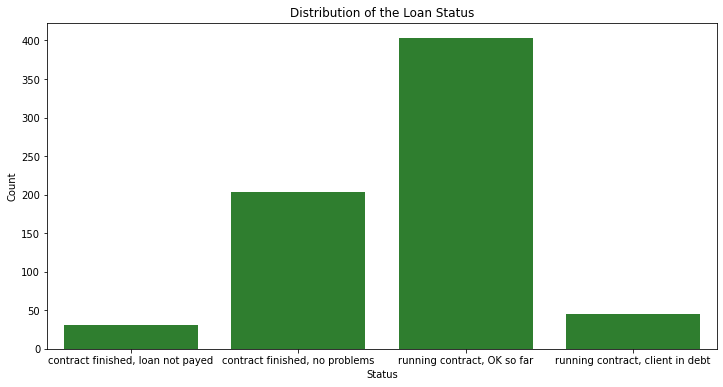

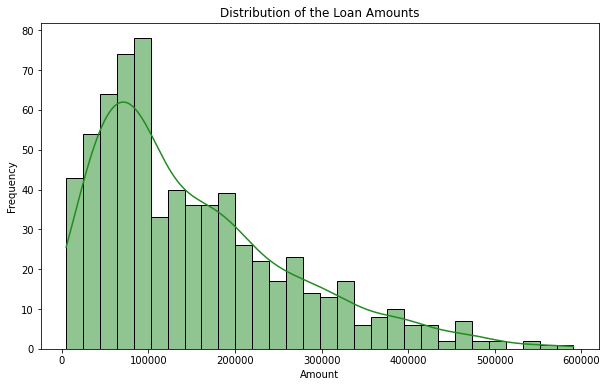

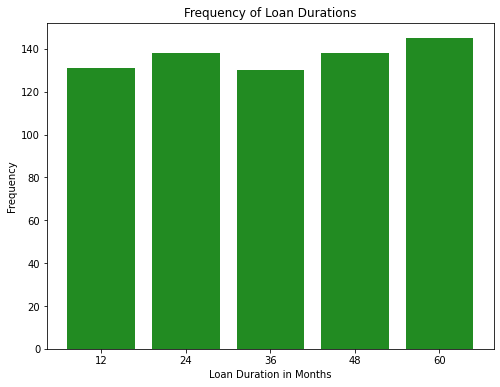

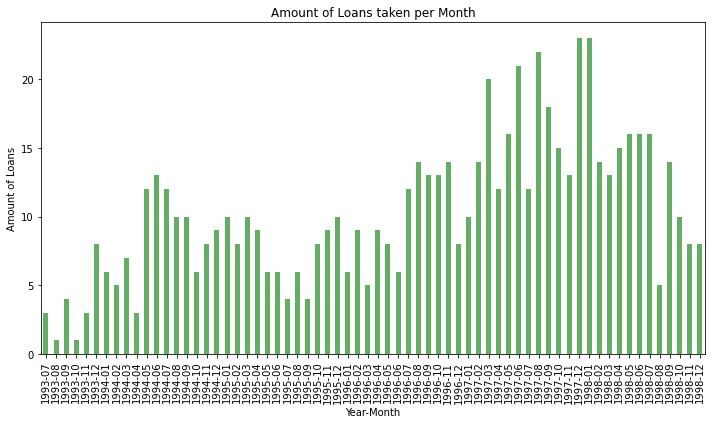

In [102]:
# Visualising the kinds of loan status
myFunctions.plot_loan_info(loan)

Short summary: Every loan has an unique ID which is connected so the account_id. The loans are also categorised and the duration is in months. The minimal duration is 12 months and the maximum duration is 60 months. There is no account with more than one loan. 

### Cards

In [103]:
# Getting an overview
print(card.shape)
print(card.info())
card.head()

# Fixing the format
card['issued'] = pd.to_datetime(card['issued'], format='%y%m%d %H:%M:%S')
card['type'].value_counts()

(892, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  892 non-null    int64 
 1   disp_id  892 non-null    int64 
 2   type     892 non-null    object
 3   issued   892 non-null    object
dtypes: int64(2), object(2)
memory usage: 28.0+ KB
None


classic    659
junior     145
gold        88
Name: type, dtype: int64

In [104]:
# Making the table readable (issued means ausgestellt)
card['issued'] = pd.to_datetime(card['issued'], format='%y%m%d %H:%M:%S', errors='coerce')

table = PrettyTable()
table.field_names = ["card_id", "disp_id", "type", "issued"]

for index, row in card.head(10).iterrows():
    table.add_row([row['card_id'], row['disp_id'], row['type'], row['issued']])

print(table)

+---------+---------+---------+---------------------+
| card_id | disp_id |   type  |        issued       |
+---------+---------+---------+---------------------+
|   1005  |   9285  | classic | 1993-11-07 00:00:00 |
|   104   |   588   | classic | 1994-01-19 00:00:00 |
|   747   |   4915  | classic | 1994-02-05 00:00:00 |
|    70   |   439   | classic | 1994-02-08 00:00:00 |
|   577   |   3687  | classic | 1994-02-15 00:00:00 |
|   377   |   2429  | classic | 1994-03-03 00:00:00 |
|   721   |   4680  |  junior | 1994-04-05 00:00:00 |
|   437   |   2762  | classic | 1994-06-01 00:00:00 |
|   188   |   1146  | classic | 1994-06-19 00:00:00 |
|    13   |    87   | classic | 1994-06-29 00:00:00 |
+---------+---------+---------+---------------------+


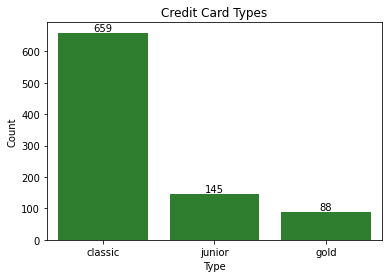

In [105]:
# How many users does every card type have?
ax = sns.countplot(data=card, x='type', color='forestgreen')
plt.title('Credit Card Types')
plt.xlabel('Type')
plt.ylabel('Count')
for bar in ax.containers:
    ax.bar_label(bar, fmt='%d', label_type='edge', fontsize=10, color='black')
plt.show()

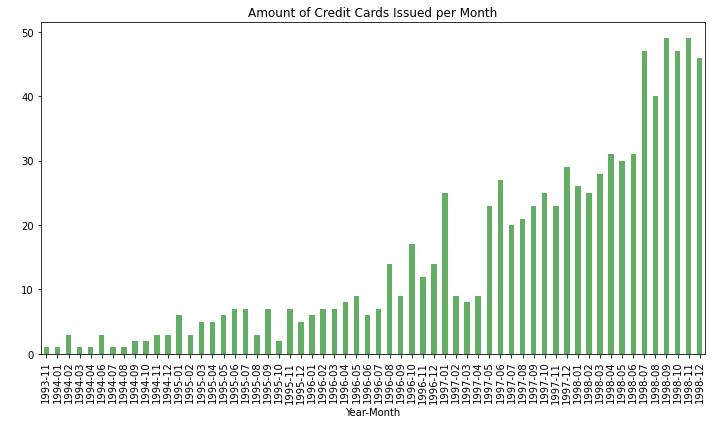

In [106]:
# In what year and month are the most cards bought?
myFunctions.plot_card_issued_per_month(card)

# Hier weiter

Summary: There are three card types: classic (659), junior (145) and gold (88). We can see, that the classic card is the most popular option for the clients. 

### Permanent Orders

In [107]:
# Getting an overview
print(order.shape)
print(order.info())
order.head()

(6471, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    6471 non-null   int64  
 1   account_id  6471 non-null   int64  
 2   bank_to     6471 non-null   object 
 3   account_to  6471 non-null   int64  
 4   amount      6471 non-null   float64
 5   k_symbol    6471 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 303.5+ KB
None


,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


In [108]:
# Changing the k_symbol to English
order.rename(columns={'k_symbol': 'payment_type'}, inplace=True)
payment_type_mapping = {
    'POJISTNE': 'insurance payment',
    'SIPO': 'household',
    'LEASING': 'leasing',
    'UVER': 'loan payment'
}
order['payment_type'] = order['payment_type'].map(payment_type_mapping)
order

,order_id,account_id,bank_to,account_to,amount,payment_type
0,29401,1,YZ,87144583,2452.0,household
1,29402,2,ST,89597016,3372.7,loan payment
2,29403,2,QR,13943797,7266.0,household
3,29404,3,WX,83084338,1135.0,household
4,29405,3,CD,24485939,327.0,NaN
...,...,...,...,...,...,...
6466,46334,11362,YZ,70641225,4780.0,household
6467,46335,11362,MN,78507822,56.0,NaN
6468,46336,11362,ST,40799850,330.0,insurance payment
6469,46337,11362,KL,20009470,129.0,NaN


In [109]:
# See which type is used most
order['payment_type'].value_counts()

household            3502
loan payment          717
insurance payment     532
leasing               341
Name: payment_type, dtype: int64

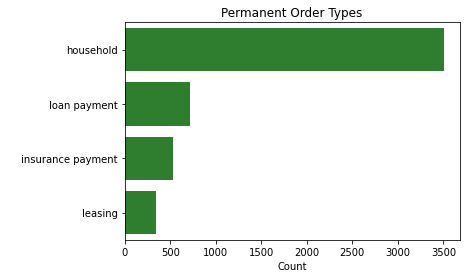

In [110]:
# Visualising the types
sns.countplot(data=order, y='payment_type', order=order['payment_type'].value_counts().index, color = 'forestgreen')
plt.title('Permanent Order Types')
plt.xlabel('Count')
plt.ylabel(' ')
plt.show()

## 2. Combining Customer and Banking Service Information


We combine the data from the six CSVs with eachother to see how they are being used. In the dataset disp.csv we have disp_id and client_id and account_id so we can combine the client to an account and also see if he's an owner or disponent. 

Remember: The goal of this Challenge is to generate customer lists for a personalised credit card advertising campaign without junior cards.

In [111]:
# Renaming the column names so we won't have date_x as column names
disp = disp.rename(columns={'type': 'disp_type'})
card = card.rename(columns={'type': 'card_type'})
trans = trans.rename(columns={'type': 'trans_type'})
trans = trans.rename(columns={'date': 'trans_date'})
loan = loan.rename(columns={'date': 'loan_date'})
loan = loan.rename(columns={'amount': 'loan_amount'})
trans = trans.rename(columns={'amount': 'trans_amount'})
account = account.rename(columns={'date': 'auto_trans_date'})

In [112]:
# Merging the first two dataframes
client_disp = pd.merge(client, disp, on='client_id', how='inner')
client_account = pd.merge(client_disp, account, on='account_id', how='inner')
client_account.rename(columns={'district_id_x': 'client_district_id', 'district_id_y': 'account_district_id'}, inplace=True)
client_account = pd.merge(
    client_account,
    district,
    left_on='client_district_id',
    right_on='district_id',
    how='left'
)

For the following merge we used the ER-diagram so we knew what to merge with what. 

In [113]:
# First, we combine loan with account. Our goal is to get account-level loan information
loan_account = pd.merge(loan, account, on='account_id', how='inner')

# Then we combine it with client_account from before
client_account_loan = pd.merge(client_account, loan_account, on='account_id', how='left', suffixes=('', '_loan'))

# Then we combine card with disp so we get client-level card information
card_disp = pd.merge(card, disp, on='disp_id', how='inner')

# Then we combine it with client_account_loan
client_full = pd.merge(client_account_loan, card_disp, on=['client_id', 'account_id'], how='left', suffixes=('', '_card'))

#### Data Pipeline Overview:
1. Loaded raw data (accounts, clients, dispositions, transactions, etc.)
2. Transformed date formats, extracted age and gender from birth_number.
3. Merged all dataframes into a single DataFrame.

## 3. Cleaning the Dataset for Model Development


Here we "clean" the data which means we decide, what data we will use for the models. 

In [114]:
# Deciding which columns we don't need
client_full.columns

Index(['client_id', 'client_district_id', 'gender', 'birth_date', 'age',
       'birth_year', 'disp_id', 'account_id', 'disp_type',
       'account_district_id', 'frequency', 'auto_trans_date', 'district_id',
       'district_name', 'region', 'inhabitants', 'villages_less_499',
       'villages_500_to_1999', 'villages_2000_to_9999',
       'villages_with_more_10000', 'number_of_cities',
       'ratio_urban_inhabitants', 'average_salary', 'unemployment_rate_95',
       'unemployment_rate_96', 'entrepreneurs_per_1000_inhabitants',
       'committed_crimes_95', 'committed_crimes_96', 'loan_id', 'loan_date',
       'loan_amount', 'duration', 'payments', 'status', 'loan_taken_per_month',
       'district_id_loan', 'frequency_loan', 'auto_trans_date_loan', 'card_id',
       'disp_id_card', 'card_type', 'issued', 'card_year_month',
       'disp_type_card'],
      dtype='object')

For the model we don't need the district_id (and we have to remove one because it's twice in there), 'villages_less_499', 'villages_500_to_1999', 'villages_2000_to_9999', 'villages_with_more_10000', 'number_of_cities', 'ratio_urban_inhabitants', 'unemployment_rate_95','unemployment_rate_96', 'entrepreneurs_per_1000_inhabitants','committed_crimes_95', 'committed_crimes_96', bank, account, loan_id. 

In [115]:
# Cleaning
columns_to_remove = [
    'client_district_id', 'account_district_id', 'villages_less_499', 'villages_500_to_1999',
    'villages_2000_to_9999', 'villages_with_more_10000', 'number_of_cities',
    'ratio_urban_inhabitants', 'unemployment_rate_95', 'unemployment_rate_96',
    'entrepreneurs_per_1000_inhabitants', 'committed_crimes_95',
    'committed_crimes_96', 'loan_id', 
]

data_clean = client_full.drop(columns=columns_to_remove)

# Model Construction

## 4. Identifying Existing Credit Card Holders, Including Purchase Date and Roll-Up Window


We assume that the date at issued is when they got the card so we define this as the purchase date. 

In [116]:
# Making sure that is in datetime format
data_clean['issued'] = pd.to_datetime(data_clean['issued'], format='%y%m%d %H:%M:%S')

data_clean['age_at_issue'] = (data_clean['issued'] - data_clean['birth_date']).dt.days / 365
junior_holders = data_clean[data_clean['card_type'] == 'junior']

oldest_junior_age_at_issue = junior_holders['age_at_issue'].max()
print(f"The oldest person who got a junior card was {oldest_junior_age_at_issue:.2f} years old at issuance.")

The oldest person who got a junior card was 20.90 years old at issuance.


In [117]:
# Define the roll-up window: We decided to take 396 days (= one year and one month) so we have one year back and the same month one year ago
data_clean['rollup_start_date'] = data_clean['issued'] - timedelta(days=396)
data_clean['rollup_end_date'] = data_clean['issued'] - timedelta(days=31) # we use 31 days to make sure we're having a whole month

In [118]:
# Creating dataframe with clients who have a credit card (without junior and NA)
card_clients = data_clean[(data_clean['card_type'] != 'junior') & (data_clean['card_type'].notna())]
unique_client_count = card_clients['client_id'].nunique()
print(f"Amount of unique Credit Card Users: {unique_client_count}")

Amount of unique Credit Card Users: 747


## 5. Determining Non-Buyers for Comparison (Including Roll-Up Window)


Here we make dataframes with only Junior-Card-Users and only Non-Credit-Card-Users and then we make one with those two together in case we need it later. 

In [119]:
# Creating dataframe with clients who have a junior card
junior_card = data_clean[(data_clean['card_type'] == 'junior')]
unique_client_count = junior_card['client_id'].nunique()
print(f"Amount of unique Junior Card Users: {unique_client_count}")

# Creating dataframe with clients who don't have a card
no_card = data_clean[(data_clean['card_type'].isna())]
unique_client_count = no_card['client_id'].nunique()
print(f"Amount of unique non-Credit Card Users: {unique_client_count}")

# Creating dataframe with clients who have either a junior card or no card 
no_and_junior_card = data_clean[(data_clean['card_type'] == 'junior') | (data_clean['card_type'].isna())]
unique_client_count = no_and_junior_card['client_id'].nunique()
print(f"Amount of unique Junior-Card and non-Credit Card Users: {unique_client_count}")

Amount of unique Junior Card Users: 145
Amount of unique non-Credit Card Users: 4477
Amount of unique Junior-Card and non-Credit Card Users: 4622


Now, we add the Roll-up Window. The distribution of the roll-up window for non-buyers and credit card buyers is similar. Additionally, the age of non-buyers is not lower than the maximum age of junior credit card holders at the end of the roll-up window.

C:\Users\chant\AppData\Local\Temp/ipykernel_2836/3838647130.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_card['rollup_end_date'] = chosen_reference_dates


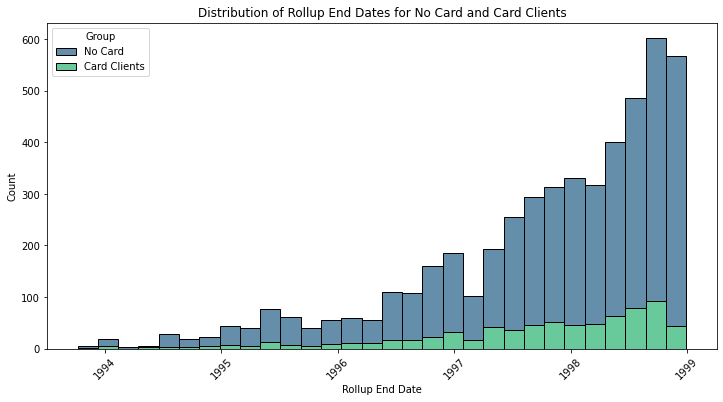

In [120]:
# Sort buyer_dates for binary search
buyer_dates = np.sort(card_clients['issued'].dropna().values)
required_days = oldest_junior_age_at_issue * 365.25

chosen_reference_dates = []

# Using iterrows is still not the most efficient, but let's keep it for clarity.
# If performance is critical, consider vectorization.
for idx, row in no_card.iterrows():
    birth_date = row['birth_date']
    min_eligible_date = birth_date + pd.Timedelta(days=required_days)
    
    # Use binary search to find the first index in buyer_dates that is greater than min_eligible_date
    insertion_point = np.searchsorted(buyer_dates, np.datetime64(min_eligible_date))
    
    if insertion_point == len(buyer_dates):
        # No eligible date found
        chosen_date = pd.NaT
    else:
        # We randomly select from eligible dates starting at insertion_point
        # Avoid slicing for performance and just pick an index randomly
        random_idx = np.random.randint(insertion_point, len(buyer_dates))
        chosen_date = buyer_dates[random_idx]
    
    chosen_reference_dates.append(chosen_date)

no_card['rollup_end_date'] = chosen_reference_dates
no_card = no_card.dropna(subset=["rollup_end_date"])
no_card['rollup_start_date'] = no_card['rollup_end_date'] - timedelta(days=365)

def plot_rollup_end_date_distribution(no_card, card_clients):
    combined_data = pd.concat([no_card[['rollup_end_date']], card_clients[['rollup_end_date']]], keys=['No Card', 'Card Clients'])
    combined_data = combined_data.reset_index(level=0).rename(columns={'level_0': 'Group'})
    
    plt.figure(figsize=(12, 6))
    sns.histplot(data=combined_data, x='rollup_end_date', hue='Group', multiple='stack', palette='viridis', bins=30)
    plt.title('Distribution of Rollup End Dates for No Card and Card Clients')
    plt.xlabel('Rollup End Date')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

plot_rollup_end_date_distribution(no_card, card_clients)

There is a difference in the number of rows in the no card after creating the rollup window. This occurs because we aim to match the distribution of the rollup window between buyers and non-buyers. Additionally, non-buyers cannot be younger than the oldest person with a junior card.

In [121]:
print(f"Amount of unique Credit Card Users with roll-up: {len(card_clients)}")
print(f"Amount of unique non-Credit Card Users with roll-up: {len(no_card)}")

Amount of unique Credit Card Users with roll-up: 747
Amount of unique non-Credit Card Users with roll-up: 4215


With this new dataframe we do some data wrangling. 

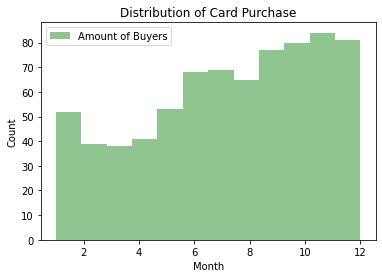

In [122]:
# In which month do card users use the card most?
buyers_with_full_rollup = card_clients[
    (card_clients['rollup_end_date'] - card_clients['rollup_start_date']) >= pd.Timedelta(days=365)
]
purchase_times = buyers_with_full_rollup['issued']

# Plot
plt.figure()
plt.hist(purchase_times.dt.month, bins=12, alpha=0.5, label='Amount of Buyers', color='forestgreen')
plt.title('Distribution of Card Purchase')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.show()

The plot shows that in November are the most cards bought. 

In the data wrangling of the trans-dataframe we saw that there is an incline of new clients. It looks a bit similar to the amount of credit card issued per month so it would be interesing to see if there is any correlation meaning that maybe the clients who open a new account also get a credit card. To find this out we merge trans with disp and card. 

We use first_transaction_year_month as then, when the client opened his account. Then we use the first date of issued because that's when the client got his card. 

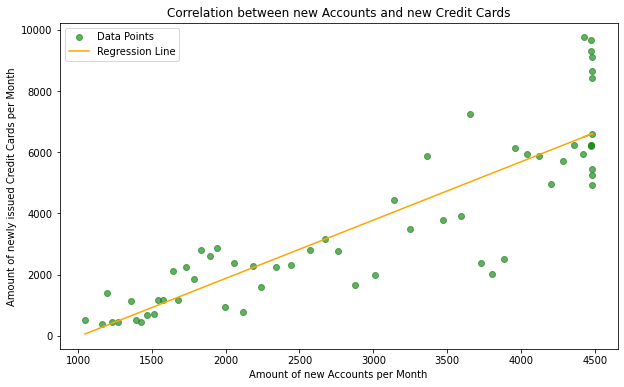

Korrelation: 0.87


In [123]:
# Do people who open a new account also get a credit card?
client_with_trans = pd.merge(client_full, trans, on='account_id', how='left', suffixes=('', '_trans'))
accounts_per_month = client_with_trans.groupby('first_transaction_year_month')['account_id'].nunique()
cards_per_month = client_with_trans.groupby('card_year_month').size()
common_index = accounts_per_month.index.intersection(cards_per_month.index) # Here ChatGPT had to help because we didn't know we had to use the indices
accounts_aligned = accounts_per_month.reindex(common_index)
cards_aligned = cards_per_month.reindex(common_index)
correlation = accounts_aligned.corr(cards_aligned)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(accounts_aligned, cards_aligned, color='forestgreen', alpha=0.7, label='Data Points')
m, b = np.polyfit(accounts_aligned, cards_aligned, 1) 
plt.plot(accounts_aligned, m * accounts_aligned + b, color='orange', label='Regression Line')
plt.xlabel('Amount of new Accounts per Month')
plt.ylabel('Amount of newly issued Credit Cards per Month')
plt.title(f'Correlation between new Accounts and new Credit Cards')
plt.legend()
plt.show()

print(f"Korrelation: {correlation:.2f}")

There is a strong correlation so that means clients who get a new account usually also get a credit card. Do people who get a loan also get a credit card? Let's find out.

C:\Users\chant\AppData\Local\Temp/ipykernel_2836/1771552122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_clients_with_loan['loan_year_month'] = card_clients_with_loan['loan_date'].dt.to_period('M')


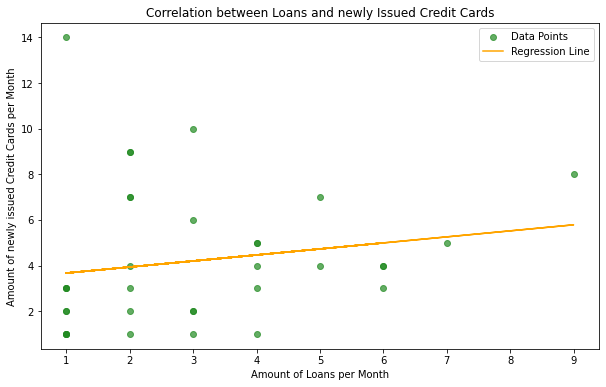

Korrelation: 0.17


In [124]:
# Do people who get a loan also get a credit card? Also used ChatGPT to help here. 
card_clients_with_loan = card_clients[card_clients['loan_date'].notnull()]
cards_per_month = card_clients_with_loan.groupby('card_year_month').size()
card_clients_with_loan['loan_year_month'] = card_clients_with_loan['loan_date'].dt.to_period('M')
loans_per_month = card_clients_with_loan.groupby('loan_year_month').size()
common_index = cards_per_month.index.intersection(loans_per_month.index)
cards_aligned = cards_per_month.reindex(common_index)
loans_aligned = loans_per_month.reindex(common_index)
correlation = cards_aligned.corr(loans_aligned)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(loans_aligned, cards_aligned, color='forestgreen', alpha=0.7, label='Data Points')
m, b = np.polyfit(loans_aligned, cards_aligned, 1)  # line of best fit
plt.plot(loans_aligned, m * loans_aligned + b, color='orange', label='Regression Line')
plt.xlabel('Amount of Loans per Month')
plt.ylabel('Amount of newly issued Credit Cards per Month')
plt.title(f'Correlation between Loans and newly Issued Credit Cards')
plt.legend()
plt.show()

print(f"Korrelation: {correlation:.2f}")

So there is no correlation between getting a loan and getting a credit card. 

## 6. Generating Event-Related Customer Information Before Credit Card Purchase Based on Transaction History


For this we use the datasets trans and disp. We merge them because in the dataset trans there are no Client IDs and we need them to see the transaction history. There also is the account_id which will be also helpful. 

In [125]:
# Merge transactions with dispositions to get client_id
trans_disp = pd.merge(trans, disp, on='account_id', how='inner')

We defined a Roll-up-Window. Within this window we want to see the transactions of the card clients. First, we write a function (so we can reuse it for other groups of clients if needed) and then we apply it to the card clients. 

In [126]:
# Apply to all card clients
card_clients['transactions'] = card_clients.apply(
    lambda row: myFunctions.get_transactions_within_window(
        trans_disp, row['client_id'], row['rollup_start_date'], row['rollup_end_date']
    ), axis=1
)

card_clients = card_clients.join(card_clients['transactions'].apply(myFunctions.extract_features))

C:\Users\chant\AppData\Local\Temp/ipykernel_2836/543434468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_clients['transactions'] = card_clients.apply(


Next we want to extract some general features about the transactions like amount of transactions or the total amount, etc. 

In [127]:
# Merge non-buyers with dispositions to get account IDs
non_buyers_disp = pd.merge(no_card, disp, on='client_id', how='inner')

non_buyers_disp.rename(columns={'account_id_x': 'account_id'}, inplace=True)

# Merge with accounts to get account opening dates if needed
non_buyers_disp = pd.merge(non_buyers_disp, account, on='account_id', how='inner')

non_buyers_disp['transactions'] = non_buyers_disp.apply(
    lambda row: myFunctions.get_transactions_within_window(
     trans_disp,   row['client_id'], row['rollup_start_date'], row['rollup_end_date']
    ), axis=1
)

# Extract features for each non-buyer
non_buyers_disp = non_buyers_disp.join(non_buyers_disp['transactions'].apply(myFunctions.extract_features))

# Feature Engineering


## 7. Deriving Customer-Specific Statistical Metrics for Wealth and Transactions in the Roll-Up Window


In [ ]:
# Apply the wealth metrics function for the card clients
card_clients = card_clients.join(card_clients['transactions'].apply(myFunctions.calculate_wealth_metrics))
card_clients = card_clients.join(card_clients['transactions'].apply(myFunctions.calculate_transaction_metrics))
card_clients = card_clients.join(card_clients['transactions'].apply(myFunctions.tsfresh_features))

KeyboardInterrupt: 

In [ ]:
# Apply the wealth metrics function
non_buyers_disp = non_buyers_disp.join(non_buyers_disp['transactions'].apply(myFunctions.calculate_wealth_metrics))
non_buyers_disp = non_buyers_disp.join(non_buyers_disp['transactions'].apply(myFunctions.calculate_transaction_metrics))
non_buyers_disp = non_buyers_disp.join(non_buyers_disp['transactions'].apply(myFunctions.tsfresh_features))

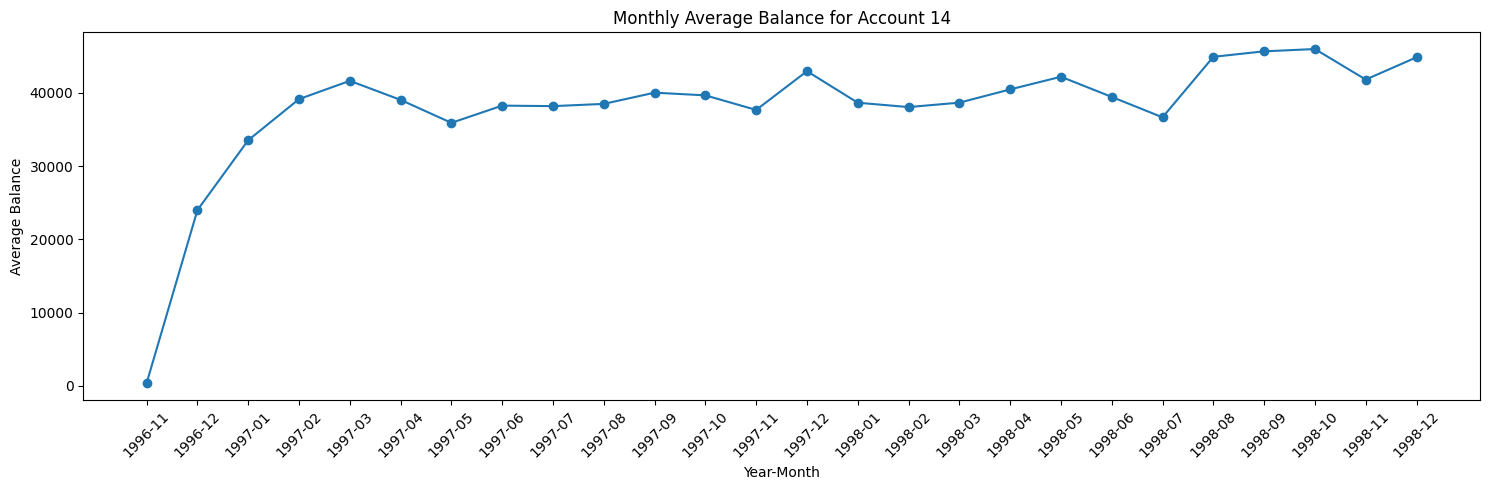

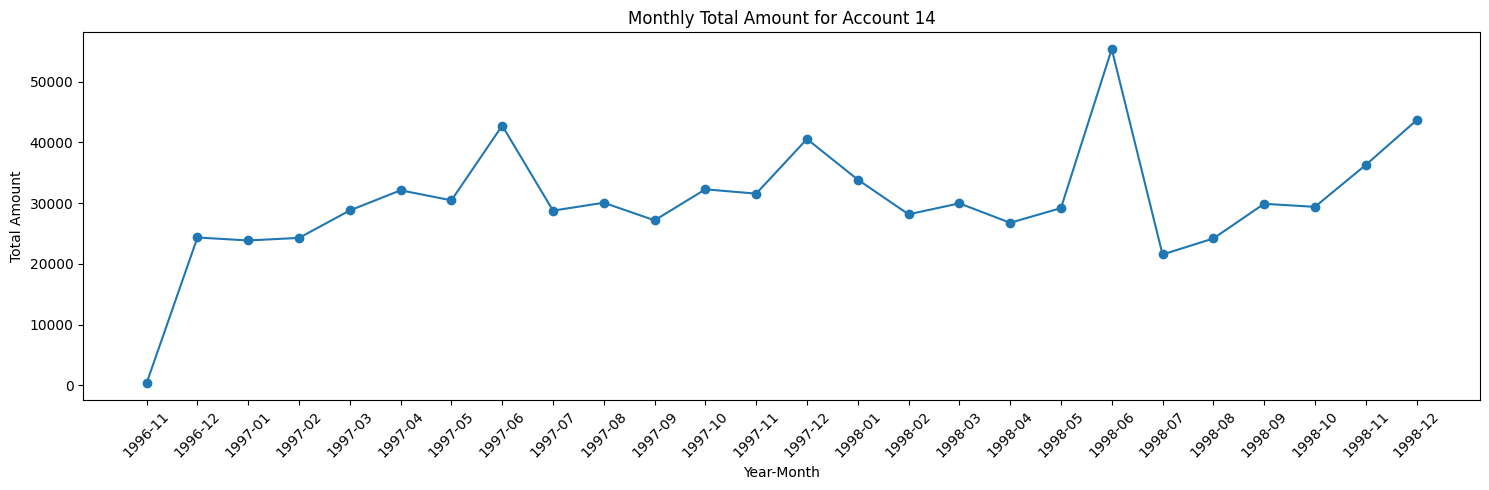

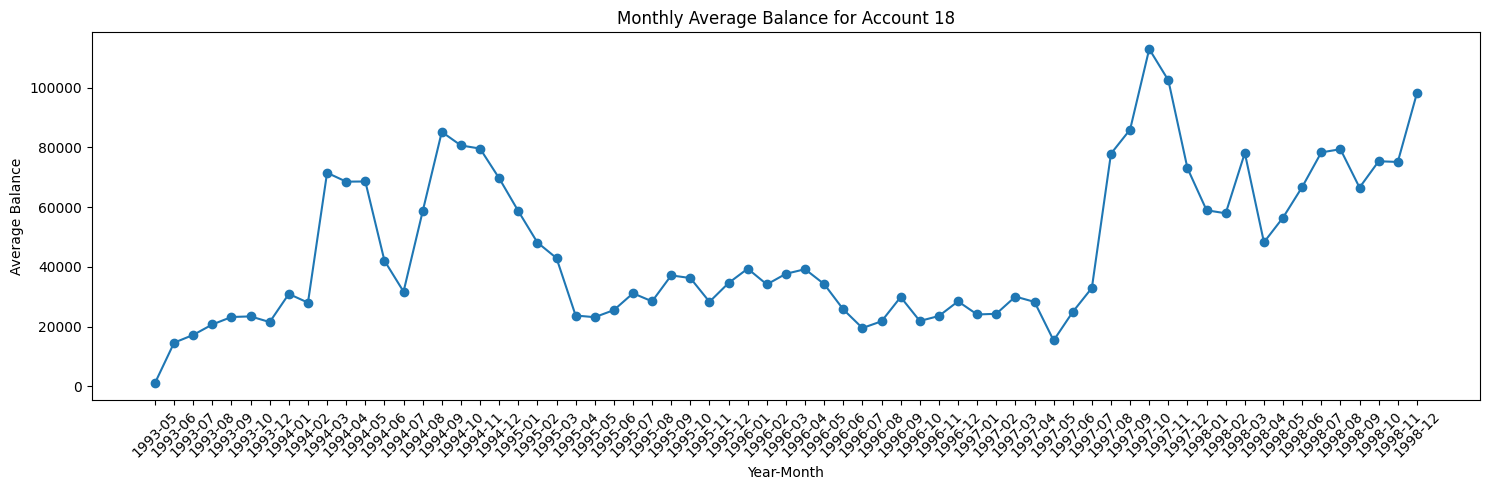

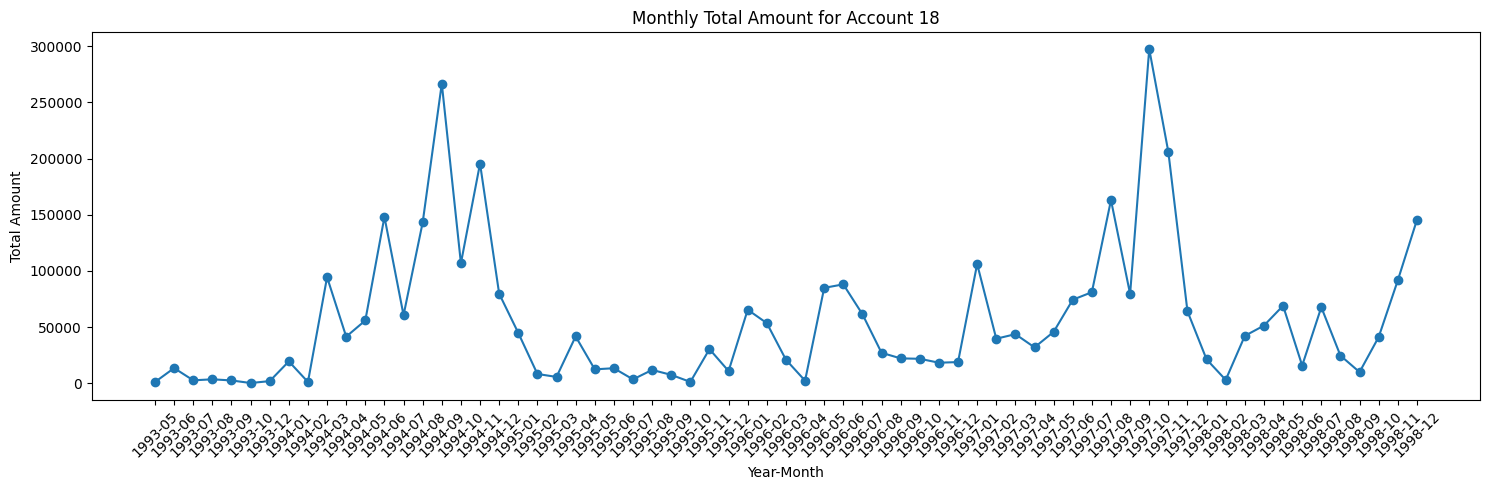

In [ ]:
# Example usage for Account #14 and Account #18:
myFunctions.plot_monthly_trends(trans_disp, 14)
myFunctions.plot_monthly_trends(trans_disp, 18)

## 8. Combining Event-Related Information from Credit Card Buyers and Non-Buyers


In [ ]:
buyers_features = [
    'client_id', 'avg_balance', 'max_balance', 'min_balance', 'balance_std', 'ending_balance',
    'amount_transactions', 'num_debit_transactions', 'num_credit_transactions',
    'total_debit_amount', 'total_credit_amount', 'avg_transaction_amount', 'transaction_frequency',
    'trans_amount__median', 'trans_amount__mean', 'trans_amount__length',
    'trans_amount__standard_deviation', 'trans_amount__variance',
    'trans_amount__root_mean_square', 'trans_amount__maximum',
    'trans_amount__absolute_maximum', 'trans_amount__minimum',
    'balance__sum_values', 'balance__median', 'balance__mean',
    'balance__length', 'balance__standard_deviation', 'balance__variance',
    'balance__root_mean_square', 'balance__maximum',
    'balance__absolute_maximum', 'balance__minimum'
]

buyers_data = card_clients[buyers_features].copy()
buyers_data['target'] = 1

non_buyers_features = buyers_features  # Same features as buyers

non_buyers_data = non_buyers_disp[non_buyers_features].copy()
non_buyers_data['target'] = 0

model_data = pd.concat([buyers_data, non_buyers_data], ignore_index=True)

# Reset index
model_data.reset_index(drop=True, inplace=True)

# Handle missing values, if any
model_data.fillna(0, inplace=True)

## 9. Cleaning Unnecessary Information (e.g., IDs) and Checking the Modeling Data via Exploratory Data Analysis


In [ ]:
model_data = client.merge(model_data, on='client_id', how='inner')

model_data.head()

,client_id,district_id,gender,birth_date,age,birth_year,avg_balance,max_balance,min_balance,balance_std,...,balance__median,balance__mean,balance__length,balance__standard_deviation,balance__variance,balance__root_mean_square,balance__maximum,balance__absolute_maximum,balance__minimum,target
0,1,18,female,1970-12-13,29,1970,15262.057143,19885.4,10722.0,2307.198551,...,15352.70,15262.057143,63.0,2288.814206,5.238670e+06,15432.726872,19885.4,19885.4,10722.0,0
1,2,1,male,1945-02-04,54,1945,43623.272619,69302.0,25037.1,10182.552756,...,43752.90,43623.272619,84.0,10121.760853,1.024500e+08,44782.138814,69302.0,69302.0,25037.1,0
2,3,1,female,1940-10-09,59,1940,32263.328736,51152.2,13148.8,7941.851147,...,32721.50,32263.328736,87.0,7896.076407,6.234802e+07,33215.514503,51152.2,51152.2,13148.8,0
3,4,5,male,1956-12-01,43,1956,20187.013793,30073.7,1000.0,6657.712482,...,21303.25,20187.013793,58.0,6600.068864,4.356091e+07,21238.560095,30073.7,30073.7,1000.0,0
4,5,5,female,1960-07-03,39,1960,0.000000,0.0,0.0,0.000000,...,0.00,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0


In [ ]:
# Remove IDs and other non-feature columns
columns_to_drop = ['client_id', 'birth_date', 'birth_year']  # Add any other unnecessary columns
model_data_cleaned = model_data.drop(columns=columns_to_drop)
model_data_cleaned['gender'] =   model_data_cleaned['gender'].map({'male': 0, 'female': 1})

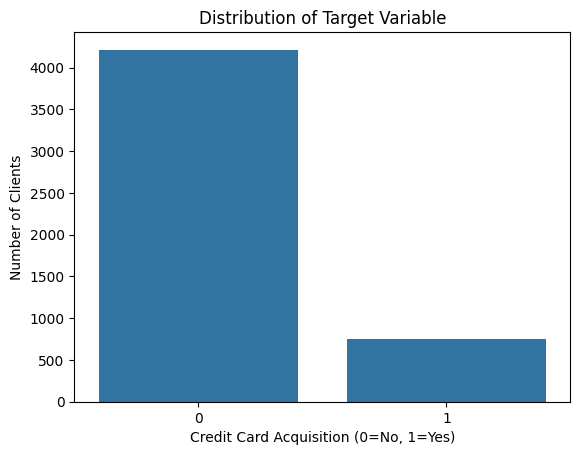

In [ ]:
sns.countplot(x='target', data=model_data_cleaned)
plt.title('Distribution of Target Variable')
plt.xlabel('Credit Card Acquisition (0=No, 1=Yes)')
plt.ylabel('Number of Clients')
plt.show()

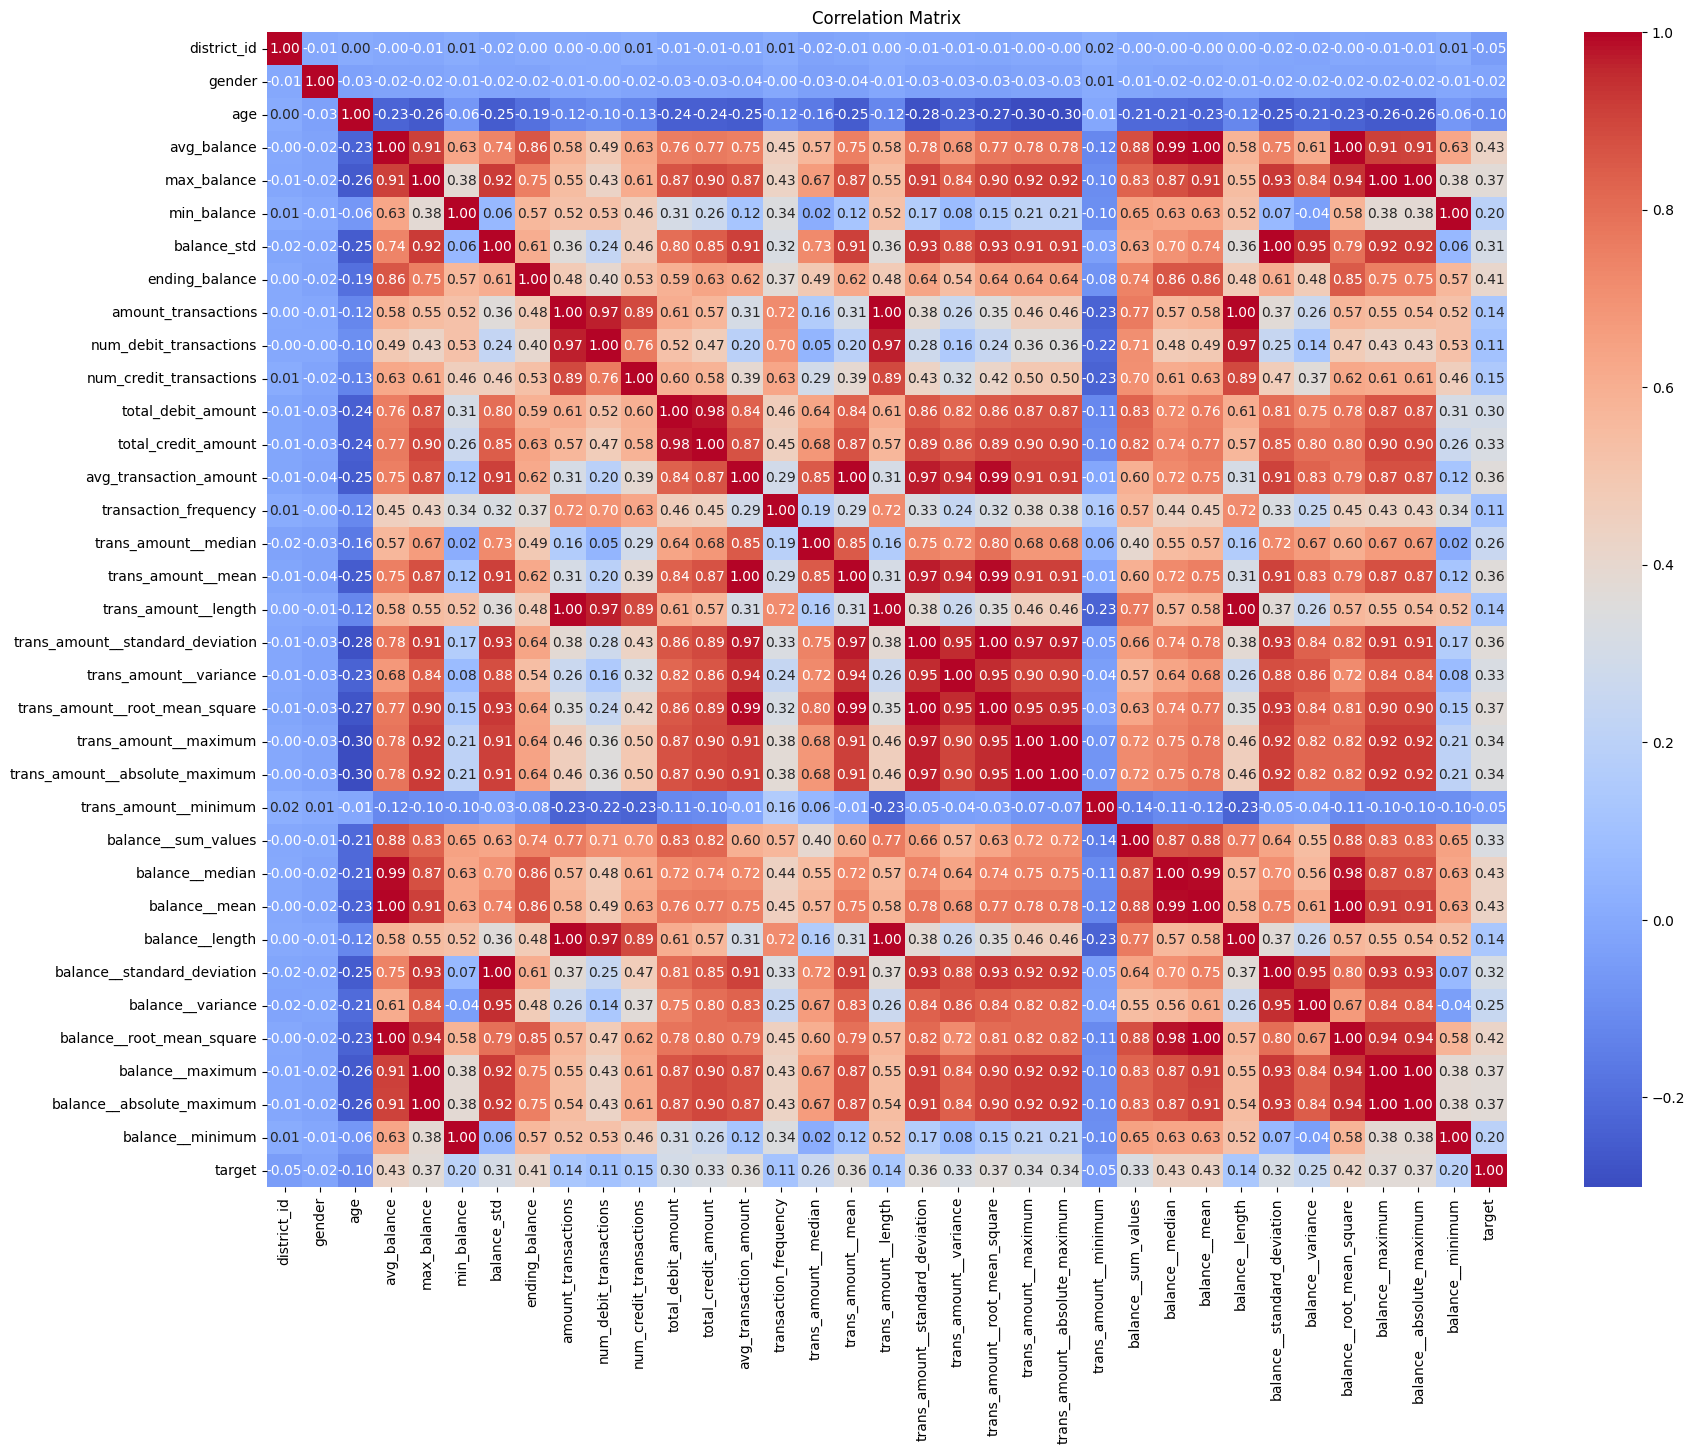

In [ ]:
corr_matrix = model_data_cleaned.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


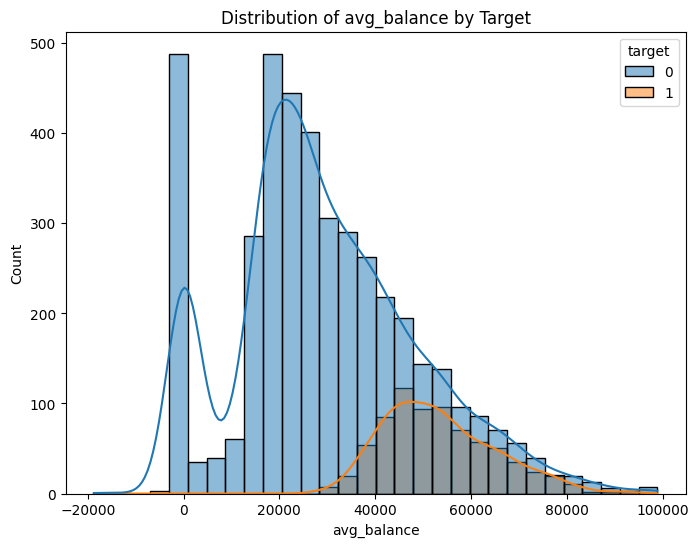

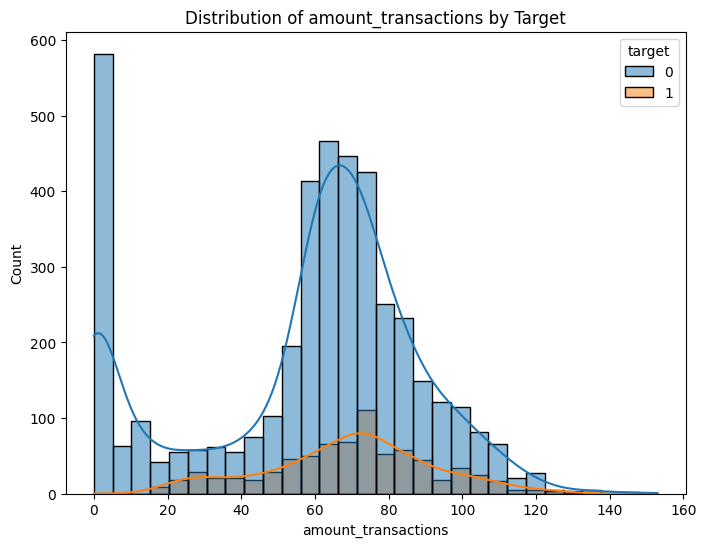

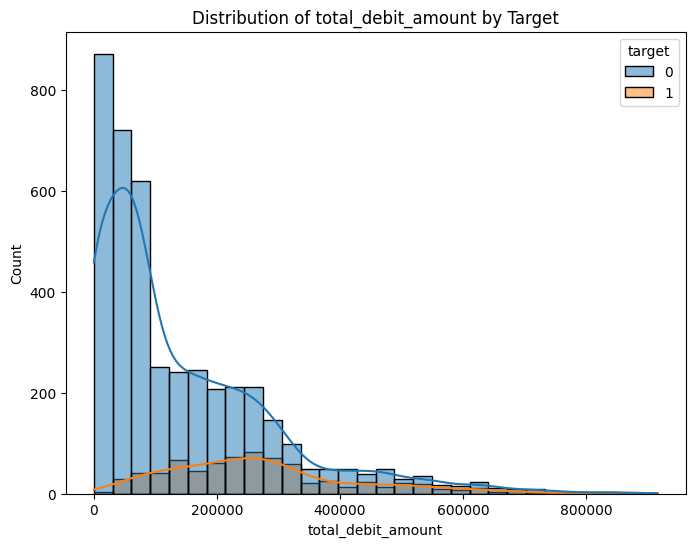

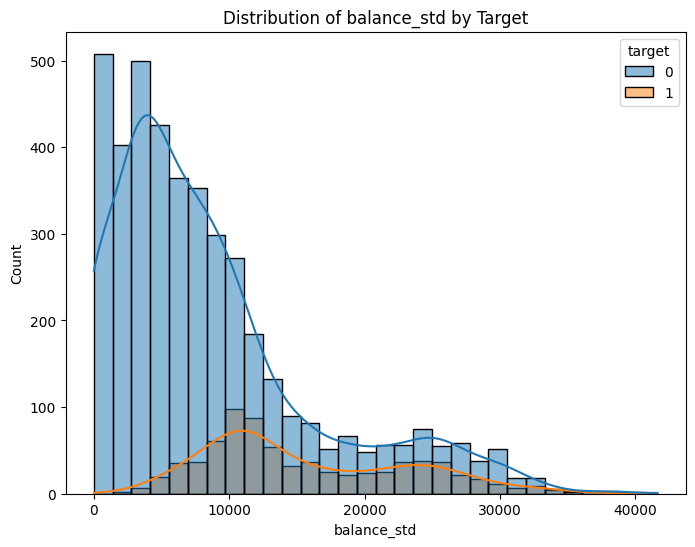

In [ ]:
feature_list = ['avg_balance', 'amount_transactions', 'total_debit_amount', 'balance_std']

for feature in feature_list:
    plt.figure(figsize=(8,6))
    sns.histplot(data=model_data_cleaned, x=feature, hue='target', bins=30, kde=True)
    plt.title(f'Distribution of {feature} by Target')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
features = model_data_cleaned.drop(columns=[ 'target', "gender", "district_id"], axis=1)
scaled_features = scaler.fit_transform(features)

model_data_cleaned[features.columns] = scaled_features

# Model Development


## 10. Partitioning the Data into Training and Test Sets


In [ ]:
model_data_cleaned.head()

,district_id,gender,age,avg_balance,max_balance,min_balance,balance_std,ending_balance,amount_transactions,num_debit_transactions,...,balance__median,balance__mean,balance__length,balance__standard_deviation,balance__variance,balance__root_mean_square,balance__maximum,balance__absolute_maximum,balance__minimum,target
0,18,1,-1.169462,-0.892488,-0.926810,-0.261544,-0.913991,-0.758677,0.112171,0.067903,...,-0.872206,-0.892488,0.112171,-0.910058,-0.642954,-0.920351,-0.926810,-0.927699,-0.261544,0
1,1,0,0.373904,0.522509,0.340805,0.857265,0.062936,-0.229218,0.803264,0.862672,...,0.572828,0.522509,0.803264,0.070330,-0.226233,0.473082,0.340805,0.340524,0.857265,0
2,1,1,0.682577,-0.044261,-0.124767,-0.071876,-0.215020,-0.227990,0.901992,0.956174,...,0.011538,-0.044261,0.901992,-0.208241,-0.398140,-0.076071,-0.124767,-0.125271,-0.071876,0
3,5,0,-0.305177,-0.646772,-0.665464,-1.021376,-0.374316,-0.463830,-0.052375,-0.119101,...,-0.569435,-0.646772,-0.052375,-0.370452,-0.478676,-0.644705,-0.665464,-0.666228,-1.021376,0
4,5,1,-0.552116,-1.653942,-1.436902,-1.099531,-1.200196,-1.453518,-1.961108,-1.708639,...,-1.653369,-1.653942,-1.961108,-1.196530,-0.665410,-1.653057,-1.436902,-1.438036,-1.099531,0


In [ ]:
# Features specified for the baseline model
features = ['age', 'gender', 'district_id', 'avg_balance', 'total_credit_amount']

X = model_data_cleaned[features]
y = model_data_cleaned['target']

# One-hot encode 'region' (if it's a categorical variable)
X = pd.get_dummies(X, columns=['district_id'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


## 11. Creating a Baseline Model Using Logistic Regression


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

# Instantiate the model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the results
print('Baseline Logistic Regression Model Performance:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')


Baseline Logistic Regression Model Performance:
Accuracy: 0.8301
Precision: 0.3535
Recall: 0.1562
F1 Score: 0.2167
ROC AUC Score: 0.8418


## 12. Systematically Exploring Improvements to the Baseline Model


In [ ]:
model_data_cleaned.head()

,district_id,gender,age,avg_balance,max_balance,min_balance,balance_std,ending_balance,amount_transactions,num_debit_transactions,...,balance__median,balance__mean,balance__length,balance__standard_deviation,balance__variance,balance__root_mean_square,balance__maximum,balance__absolute_maximum,balance__minimum,target
0,18,1,-1.169462,-0.892488,-0.926810,-0.261544,-0.913991,-0.758677,0.112171,0.067903,...,-0.872206,-0.892488,0.112171,-0.910058,-0.642954,-0.920351,-0.926810,-0.927699,-0.261544,0
1,1,0,0.373904,0.522509,0.340805,0.857265,0.062936,-0.229218,0.803264,0.862672,...,0.572828,0.522509,0.803264,0.070330,-0.226233,0.473082,0.340805,0.340524,0.857265,0
2,1,1,0.682577,-0.044261,-0.124767,-0.071876,-0.215020,-0.227990,0.901992,0.956174,...,0.011538,-0.044261,0.901992,-0.208241,-0.398140,-0.076071,-0.124767,-0.125271,-0.071876,0
3,5,0,-0.305177,-0.646772,-0.665464,-1.021376,-0.374316,-0.463830,-0.052375,-0.119101,...,-0.569435,-0.646772,-0.052375,-0.370452,-0.478676,-0.644705,-0.665464,-0.666228,-1.021376,0
4,5,1,-0.552116,-1.653942,-1.436902,-1.099531,-1.200196,-1.453518,-1.961108,-1.708639,...,-1.653369,-1.653942,-1.961108,-1.196530,-0.665410,-1.653057,-1.436902,-1.438036,-1.099531,0


In [ ]:
# Include additional features
additional_features = [
    'amount_transactions', 'total_debit_amount', 'avg_transaction_amount',
    'balance_std', 'ending_balance', 'trans_amount__median', 'trans_amount__mean', 'trans_amount__length',
       'trans_amount__standard_deviation', 'trans_amount__variance',
       'trans_amount__root_mean_square', 'trans_amount__maximum',
       'trans_amount__absolute_maximum', 'trans_amount__minimum',
       'balance__sum_values', 'balance__median', 'balance__mean',
       'balance__length', 'balance__standard_deviation', 'balance__variance',
       'balance__root_mean_square', 'balance__maximum',
       'balance__absolute_maximum', 'balance__minimum' ]

# Combine with previous features
expanded_features = features + additional_features

# Prepare the dataset
X_expanded = model_data_cleaned[expanded_features]

# Handle categorical variables
X_expanded = pd.get_dummies(X_expanded, columns=['district_id'], drop_first=True)

# Fill missing values if any
X_expanded.fillna(0, inplace=True)

# Split the data
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(
    X_expanded, y, test_size=0.3, random_state=42, stratify=y
)


In [ ]:
# Instantiate and train the model
log_reg_exp = LogisticRegression(max_iter=1000)
log_reg_exp.fit(X_train_exp, y_train_exp)

# Evaluate the model
y_pred_exp = log_reg_exp.predict(X_test_exp)
y_pred_proba_exp = log_reg_exp.predict_proba(X_test_exp)[:, 1]

# Calculate evaluation metrics
accuracy_exp = accuracy_score(y_test_exp, y_pred_exp)
precision_exp = precision_score(y_test_exp, y_pred_exp)
recall_exp = recall_score(y_test_exp, y_pred_exp)
f1_exp = f1_score(y_test_exp, y_pred_exp)
roc_auc_exp = roc_auc_score(y_test_exp, y_pred_proba_exp)

# Print the results
print('Expanded Logistic Regression Model Performance:')
print(f'Accuracy: {accuracy_exp:.4f}')
print(f'Precision: {precision_exp:.4f}')
print(f'Recall: {recall_exp:.4f}')
print(f'F1 Score: {f1_exp:.4f}')
print(f'ROC AUC Score: {roc_auc_exp:.4f}')


Expanded Logistic Regression Model Performance:
Accuracy: 0.8442
Precision: 0.4623
Recall: 0.2188
F1 Score: 0.2970
ROC AUC Score: 0.8595


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train_exp, y_train_exp)

# Evaluate the model
y_pred_rf = rf_clf.predict(X_test_exp)
y_pred_proba_rf = rf_clf.predict_proba(X_test_exp)[:, 1]

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test_exp, y_pred_rf)
precision_rf = precision_score(y_test_exp, y_pred_rf)
recall_rf = recall_score(y_test_exp, y_pred_rf)
f1_rf = f1_score(y_test_exp, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test_exp, y_pred_proba_rf)

# Print the results
print('Random Forest Model Performance:')
print(f'Accuracy: {accuracy_rf:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print(f'F1 Score: {f1_rf:.4f}')
print(f'ROC AUC Score: {roc_auc_rf:.4f}')


Random Forest Model Performance:
Accuracy: 0.8509
Precision: 0.5086
Recall: 0.2634
F1 Score: 0.3471
ROC AUC Score: 0.8848


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_clf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train_exp, y_train_exp)

# Best parameters
print(f'Best parameters found: {grid_search.best_params_}')

# Best estimator
best_rf = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_rf = best_rf.predict(X_test_exp)
y_pred_proba_best_rf = best_rf.predict_proba(X_test_exp)[:, 1]

# Calculate evaluation metrics
accuracy_best_rf = accuracy_score(y_test_exp, y_pred_best_rf)
precision_best_rf = precision_score(y_test_exp, y_pred_best_rf)
recall_best_rf = recall_score(y_test_exp, y_pred_best_rf)
f1_best_rf = f1_score(y_test_exp, y_pred_best_rf)
roc_auc_best_rf = roc_auc_score(y_test_exp, y_pred_proba_best_rf)

# Print the results
print('Optimized Random Forest Model Performance:')
print(f'Accuracy: {accuracy_best_rf:.4f}')
print(f'Precision: {precision_best_rf:.4f}')
print(f'Recall: {recall_best_rf:.4f}')
print(f'F1 Score: {f1_best_rf:.4f}')
print(f'ROC AUC Score: {roc_auc_best_rf:.4f}')


Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest Model Performance:
Accuracy: 0.8556
Precision: 0.5437
Recall: 0.2500
F1 Score: 0.3425
ROC AUC Score: 0.8868


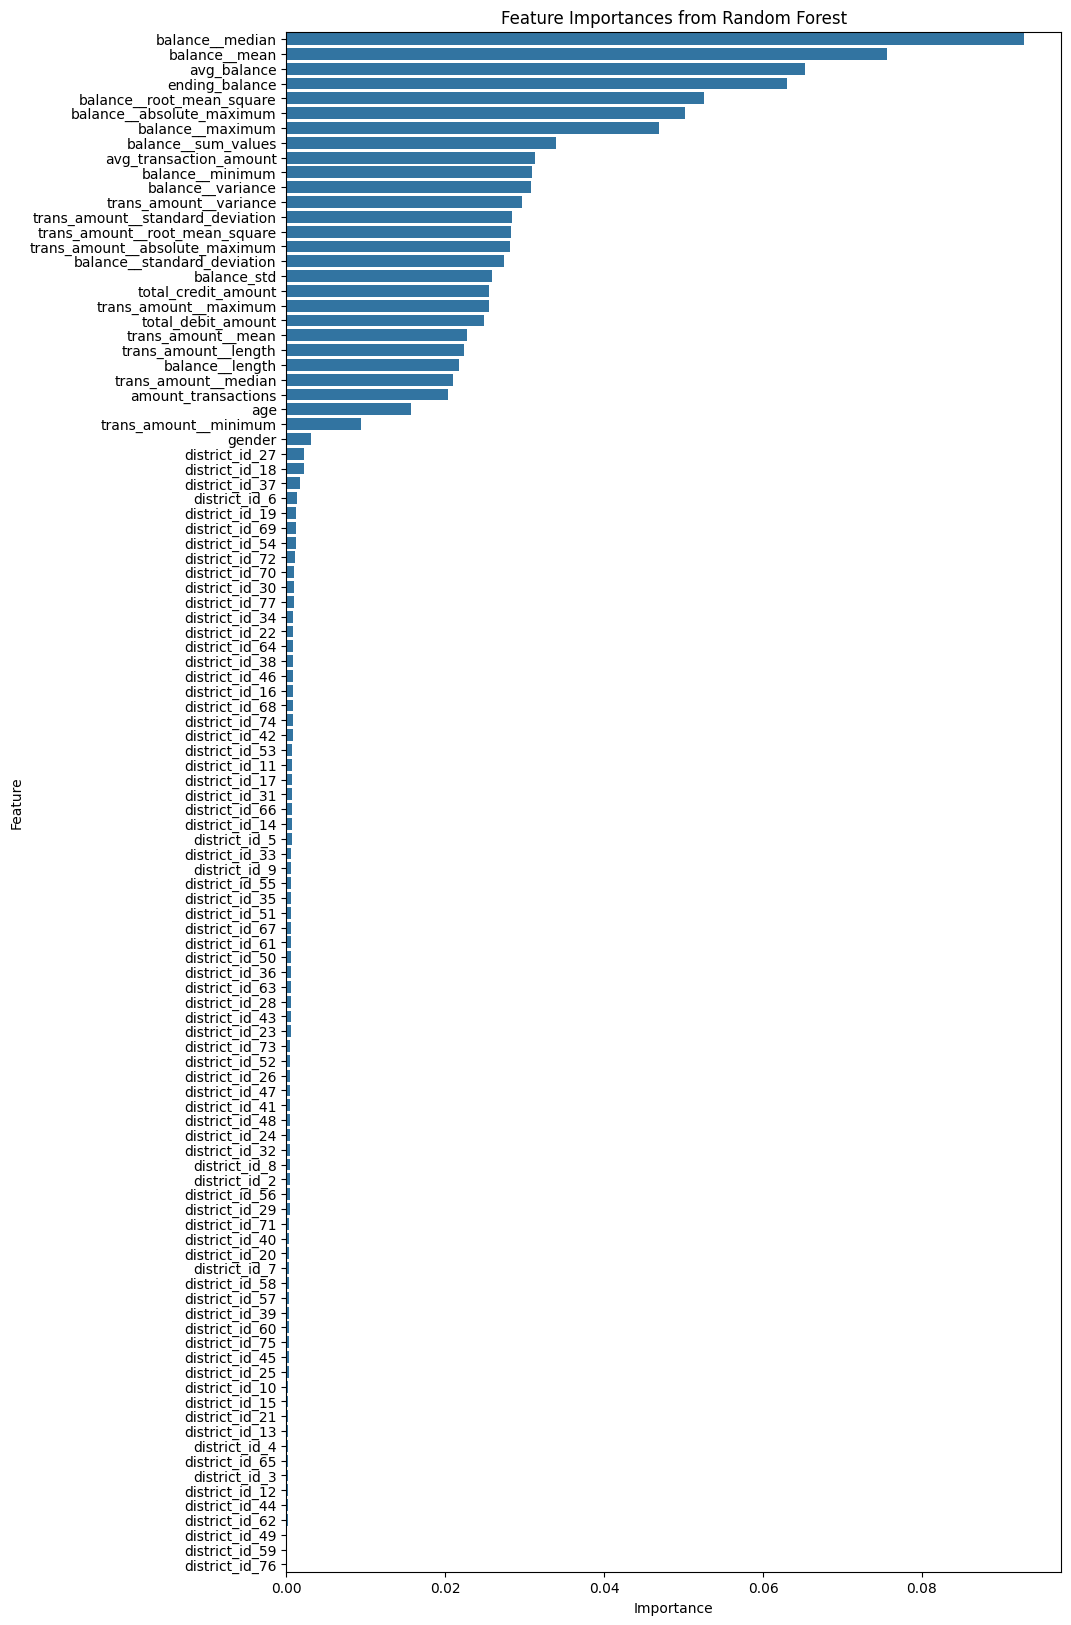

In [ ]:
importances = best_rf.feature_importances_
feature_names = X_train_exp.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 20))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()

In [ ]:
performance_summary = pd.DataFrame({
    'Model': ['Baseline Logistic Regression', 'Expanded Logistic Regression', 'Random Forest', 'Optimized Random Forest'],
    'Accuracy': [accuracy, accuracy_exp, accuracy_rf, accuracy_best_rf],
    'Precision': [precision, precision_exp, precision_rf, precision_best_rf],
    'Recall': [recall, recall_exp, recall_rf, recall_best_rf],
    'F1 Score': [f1, f1_exp, f1_rf, f1_best_rf],
    'ROC AUC': [roc_auc, roc_auc_exp, roc_auc_rf, roc_auc_best_rf]
})

print(performance_summary)


                          Model  Accuracy  Precision    Recall  F1 Score  \
0  Baseline Logistic Regression  0.830087   0.353535  0.156250  0.216718   
1  Expanded Logistic Regression  0.844191   0.462264  0.218750  0.296970   
2                 Random Forest  0.850907   0.508621  0.263393  0.347059   
3       Optimized Random Forest  0.855608   0.543689  0.250000  0.342508   

    ROC AUC  
0  0.841830  
1  0.859514  
2  0.884776  
3  0.886784  


# Model Comparison, Selection, and Optimization


## 13. Comparing Candidate Models and Identifying the Best Model Using ROC, AUC, and Precision


In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Baseline Logistic Regression
baseline_metrics = {
    'Model': 'Baseline Logistic Regression',
    'ROC AUC': roc_auc_score(y_test, y_pred_proba),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}

# Expanded Logistic Regression
expanded_metrics = {
    'Model': 'Expanded Logistic Regression',
    'ROC AUC': roc_auc_score(y_test_exp, y_pred_proba_exp),
    'Precision': precision_score(y_test_exp, y_pred_exp),
    'Recall': recall_score(y_test_exp, y_pred_exp),
    'F1 Score': f1_score(y_test_exp, y_pred_exp)
}

# Random Forest
rf_metrics = {
    'Model': 'Random Forest',
    'ROC AUC': roc_auc_score(y_test_exp, y_pred_proba_rf),
    'Precision': precision_score(y_test_exp, y_pred_rf),
    'Recall': recall_score(y_test_exp, y_pred_rf),
    'F1 Score': f1_score(y_test_exp, y_pred_rf)
}

# Optimized Random Forest
opt_rf_metrics = {
    'Model': 'Optimized Random Forest',
    'ROC AUC': roc_auc_score(y_test_exp, y_pred_proba_best_rf),
    'Precision': precision_score(y_test_exp, y_pred_best_rf),
    'Recall': recall_score(y_test_exp, y_pred_best_rf),
    'F1 Score': f1_score(y_test_exp, y_pred_best_rf)
}

# Create a DataFrame for comparison
metrics_df = pd.DataFrame([baseline_metrics, expanded_metrics, rf_metrics, opt_rf_metrics])
print(metrics_df)


                          Model   ROC AUC  Precision    Recall  F1 Score
0  Baseline Logistic Regression  0.841830   0.353535  0.156250  0.216718
1  Expanded Logistic Regression  0.859514   0.462264  0.218750  0.296970
2                 Random Forest  0.884776   0.508621  0.263393  0.347059
3       Optimized Random Forest  0.886784   0.543689  0.250000  0.342508


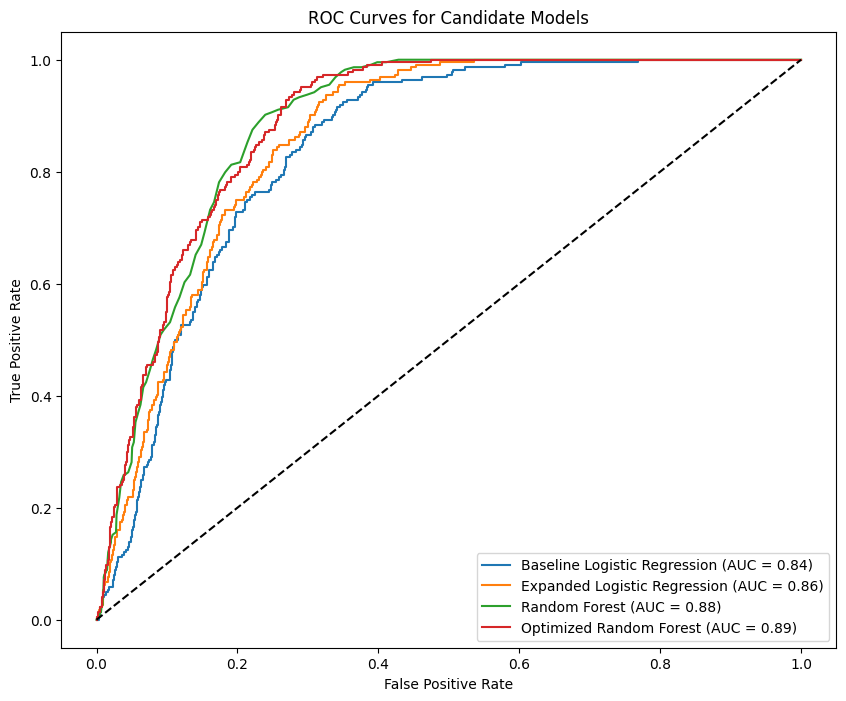

In [ ]:
myFunctions. plot_roc_curves(y_test, y_pred_proba, y_test_exp, y_pred_proba_exp, y_pred_proba_best_rf, y_pred_proba_rf, opt_rf_metrics, rf_metrics, baseline_metrics, expanded_metrics)


## 14. Quantitative Examination of Differences in Top-N Customer Lists of Different Models


In [ ]:
import pandas as pd

# Determine the number of top customers for 5% and 10%
N_5 = int(0.05 * len(X_test))
N_10 = int(0.10 * len(X_test))

# Create DataFrames with client IDs and predicted probabilities for each model
baseline_probs = pd.DataFrame({'client_id': X_test.index, 'probability': y_pred_proba})
expanded_probs = pd.DataFrame({'client_id': X_test.index, 'probability': y_pred_proba_exp})
rf_probs = pd.DataFrame({'client_id': X_test.index, 'probability': y_pred_proba_rf})
opt_rf_probs = pd.DataFrame({'client_id': X_test.index, 'probability': y_pred_proba_best_rf})

# Sort by probability (descending) and select top 5% and top 10%
top5_baseline = set(baseline_probs.sort_values('probability', ascending=False).head(N_5)['client_id'])
top5_expanded = set(expanded_probs.sort_values('probability', ascending=False).head(N_5)['client_id'])
top5_rf = set(rf_probs.sort_values('probability', ascending=False).head(N_5)['client_id'])
top5_opt_rf = set(opt_rf_probs.sort_values('probability', ascending=False).head(N_5)['client_id'])

top10_baseline = set(baseline_probs.sort_values('probability', ascending=False).head(N_10)['client_id'])
top10_expanded = set(expanded_probs.sort_values('probability', ascending=False).head(N_10)['client_id'])
top10_rf = set(rf_probs.sort_values('probability', ascending=False).head(N_10)['client_id'])
top10_opt_rf = set(opt_rf_probs.sort_values('probability', ascending=False).head(N_10)['client_id'])

# Calculate overlaps for top 5%
overlap_5_baseline_expanded = len(top5_baseline & top5_expanded)
overlap_5_baseline_rf = len(top5_baseline & top5_rf)
overlap_5_baseline_opt_rf = len(top5_baseline & top5_opt_rf)
overlap_5_expanded_rf = len(top5_expanded & top5_rf)
overlap_5_expanded_opt_rf = len(top5_expanded & top5_opt_rf)
overlap_5_rf_opt_rf = len(top5_rf & top5_opt_rf)

# Calculate overlaps for top 10%
overlap_10_baseline_expanded = len(top10_baseline & top10_expanded)
overlap_10_baseline_rf = len(top10_baseline & top10_rf)
overlap_10_baseline_opt_rf = len(top10_baseline & top10_opt_rf)
overlap_10_expanded_rf = len(top10_expanded & top10_rf)
overlap_10_expanded_opt_rf = len(top10_expanded & top10_opt_rf)
overlap_10_rf_opt_rf = len(top10_rf & top10_opt_rf)

# Display overlaps
print("Top 5% Overlaps:")
print(f'Overlap between Baseline and Expanded Logistic Regression (Top 5%): {overlap_5_baseline_expanded}')
print(f'Overlap between Baseline and Random Forest (Top 5%): {overlap_5_baseline_rf}')
print(f'Overlap between Baseline and Optimized Random Forest (Top 5%): {overlap_5_baseline_opt_rf}')
print(f'Overlap between Expanded Logistic Regression and Random Forest (Top 5%): {overlap_5_expanded_rf}')
print(f'Overlap between Expanded Logistic Regression and Optimized Random Forest (Top 5%): {overlap_5_expanded_opt_rf}')
print(f'Overlap between Random Forest and Optimized Random Forest (Top 5%): {overlap_5_rf_opt_rf}')

print("\nTop 10% Overlaps:")
print(f'Overlap between Baseline and Expanded Logistic Regression (Top 10%): {overlap_10_baseline_expanded}')
print(f'Overlap between Baseline and Random Forest (Top 10%): {overlap_10_baseline_rf}')
print(f'Overlap between Baseline and Optimized Random Forest (Top 10%): {overlap_10_baseline_opt_rf}')
print(f'Overlap between Expanded Logistic Regression and Random Forest (Top 10%): {overlap_10_expanded_rf}')
print(f'Overlap between Expanded Logistic Regression and Optimized Random Forest (Top 10%): {overlap_10_expanded_opt_rf}')
print(f'Overlap between Random Forest and Optimized Random Forest (Top 10%): {overlap_10_rf_opt_rf}')


Top 5% Overlaps:
Overlap between Baseline and Expanded Logistic Regression (Top 5%): 40
Overlap between Baseline and Random Forest (Top 5%): 4
Overlap between Baseline and Optimized Random Forest (Top 5%): 3
Overlap between Expanded Logistic Regression and Random Forest (Top 5%): 24
Overlap between Expanded Logistic Regression and Optimized Random Forest (Top 5%): 26
Overlap between Random Forest and Optimized Random Forest (Top 5%): 59

Top 10% Overlaps:
Overlap between Baseline and Expanded Logistic Regression (Top 10%): 91
Overlap between Baseline and Random Forest (Top 10%): 43
Overlap between Baseline and Optimized Random Forest (Top 10%): 46
Overlap between Expanded Logistic Regression and Random Forest (Top 10%): 79
Overlap between Expanded Logistic Regression and Optimized Random Forest (Top 10%): 79
Overlap between Random Forest and Optimized Random Forest (Top 10%): 127


## 15. Optimizing the Best Candidate Model Regarding Hyperparameter Settings


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(10, 51, 10)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True, False]
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# Fit to the training data
random_search.fit(X_train_exp, y_train_exp)

# Best parameters found
print("Best parameters found:")
print(random_search.best_params_)

# Best estimator
best_model = random_search.best_estimator_


Best parameters found:
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 485}


In [ ]:
# Predictions on the test set
y_pred_best = best_model.predict(X_test_exp)
y_pred_proba_best = best_model.predict_proba(X_test_exp)[:, 1]

# Calculate evaluation metrics
best_metrics = {
    'Model': 'Further Optimized Random Forest',
    'ROC AUC': roc_auc_score(y_test_exp, y_pred_proba_best),
    'Precision': precision_score(y_test_exp, y_pred_best),
    'Recall': recall_score(y_test_exp, y_pred_best),
    'F1 Score': f1_score(y_test_exp, y_pred_best)
}

print("Further Optimized Random Forest Model Performance:")
print(best_metrics)


Further Optimized Random Forest Model Performance:
{'Model': 'Further Optimized Random Forest', 'ROC AUC': 0.889451581027668, 'Precision': 0.5567010309278351, 'Recall': 0.24107142857142858, 'F1 Score': 0.3364485981308411}


In [ ]:
new_row = pd.DataFrame([best_metrics])

metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

print(metrics_df)


                             Model   ROC AUC  Precision    Recall  F1 Score
0     Baseline Logistic Regression  0.841830   0.353535  0.156250  0.216718
1     Expanded Logistic Regression  0.859514   0.462264  0.218750  0.296970
2                    Random Forest  0.884776   0.508621  0.263393  0.347059
3          Optimized Random Forest  0.886784   0.543689  0.250000  0.342508
4  Further Optimized Random Forest  0.889452   0.556701  0.241071  0.336449


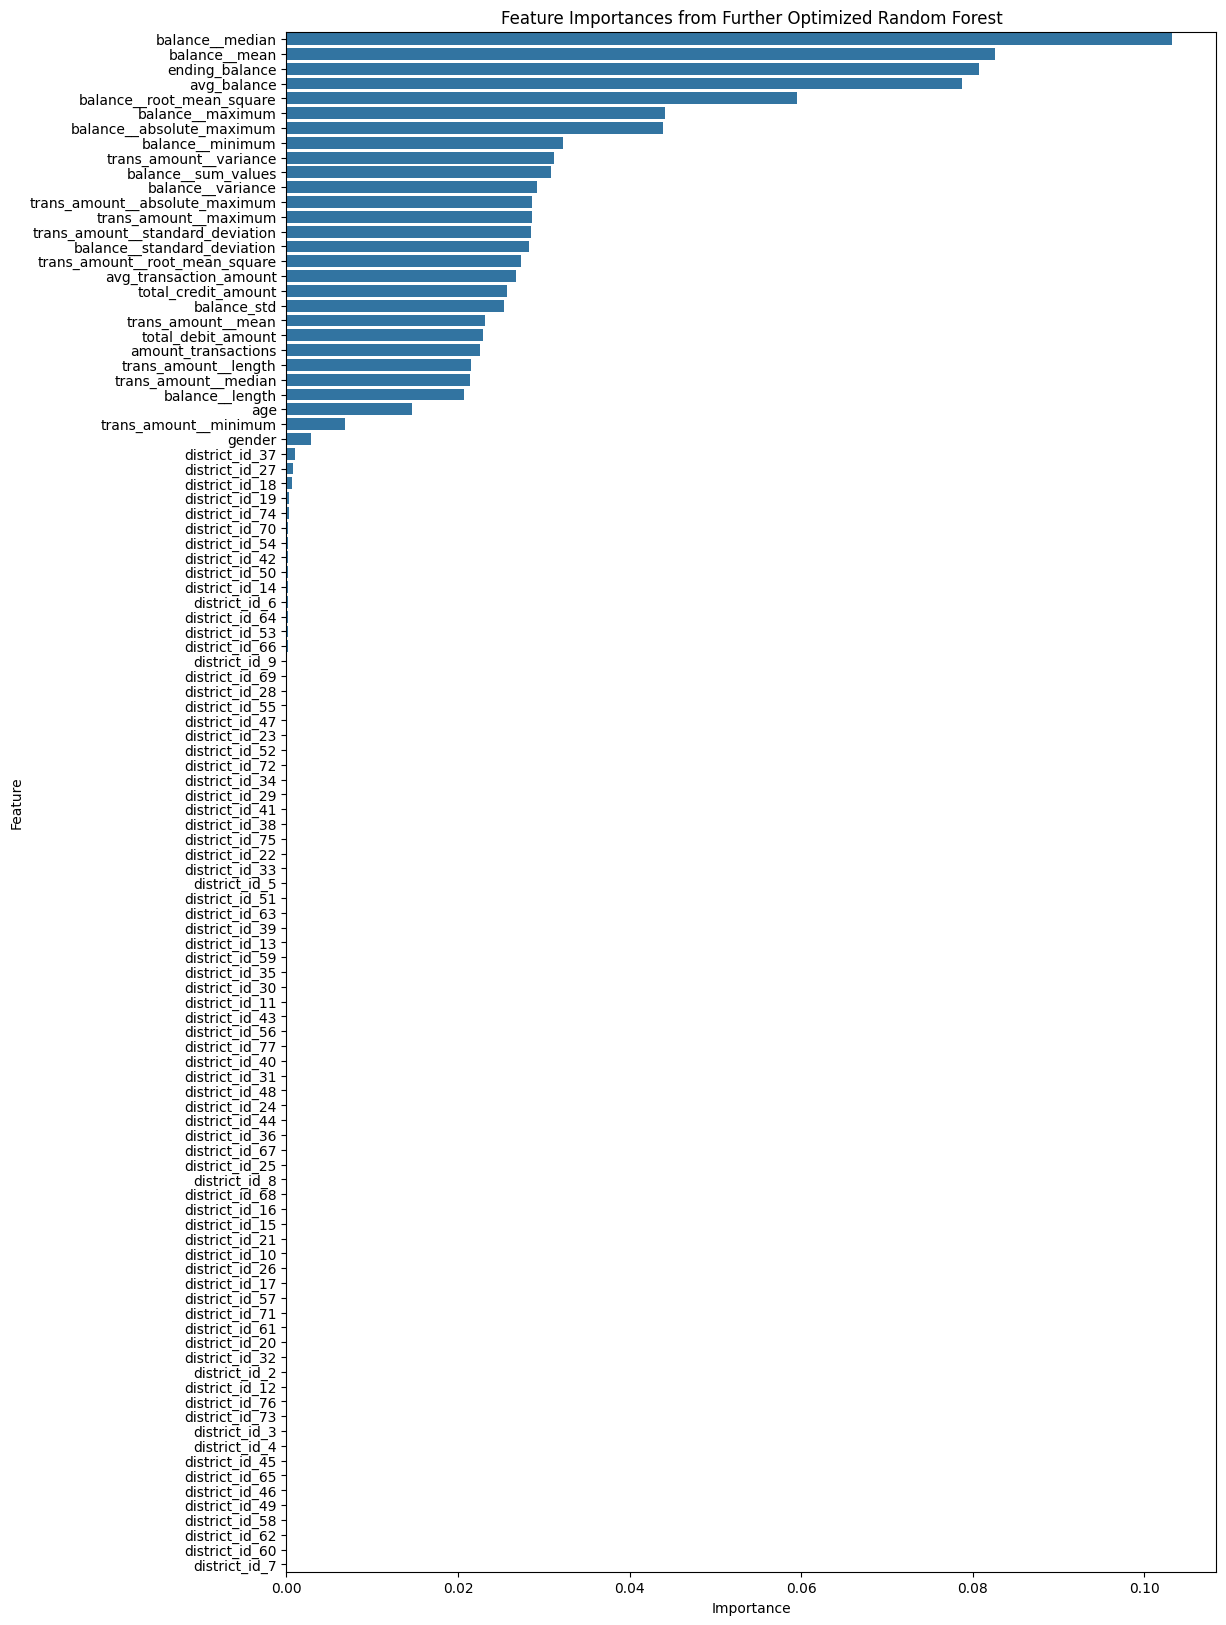

In [ ]:
# Feature importances
importances = best_model.feature_importances_
feature_names = X_train_exp.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(12, 20))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Further Optimized Random Forest')
plt.show()


# Model Explanation and Reduction


## 16. Examining Global Feature Importance and Model Reduction


In [ ]:
# Select top N features
N = 5
top_features = importance_df['Feature'].head(N).tolist()
print(f"Top {N} features: {top_features}")


Top 5 features: ['balance__median', 'balance__mean', 'ending_balance', 'avg_balance', 'balance__root_mean_square']


In [ ]:
# Prepare the dataset with only top features
X_train_reduced = X_train_exp[top_features]
X_test_reduced = X_test_exp[top_features]

# Retrain the model
# best_model_reduced = RandomForestClassifier(random_state=42, **random_search.best_params_)
best_model_reduced = RandomForestClassifier(random_state=42)

best_model_reduced.fit(X_train_reduced, y_train_exp)

# Evaluate the reduced model
y_pred_reduced = best_model_reduced.predict(X_test_reduced)
y_pred_proba_reduced = best_model_reduced.predict_proba(X_test_reduced)[:, 1]

# Calculate evaluation metrics
reduced_metrics = {
    'Model': 'Reduced Random Forest',
    'ROC AUC': roc_auc_score(y_test_exp, y_pred_proba_reduced),
    'Precision': precision_score(y_test_exp, y_pred_reduced),
    'Recall': recall_score(y_test_exp, y_pred_reduced),
    'F1 Score': f1_score(y_test_exp, y_pred_reduced)
}

print("Reduced Random Forest Model Performance:")
print(reduced_metrics)


Reduced Random Forest Model Performance:
{'Model': 'Reduced Random Forest', 'ROC AUC': 0.8530844155844157, 'Precision': 0.3931034482758621, 'Recall': 0.2544642857142857, 'F1 Score': 0.3089430894308943}


In [ ]:
new_row = pd.DataFrame([reduced_metrics])

metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)
print(metrics_df)


                             Model   ROC AUC  Precision    Recall  F1 Score
0     Baseline Logistic Regression  0.841830   0.353535  0.156250  0.216718
1     Expanded Logistic Regression  0.859514   0.462264  0.218750  0.296970
2                    Random Forest  0.884776   0.508621  0.263393  0.347059
3          Optimized Random Forest  0.886784   0.543689  0.250000  0.342508
4  Further Optimized Random Forest  0.889452   0.556701  0.241071  0.336449
5            Reduced Random Forest  0.853084   0.393103  0.254464  0.308943


In [ ]:
results = []
for n in range(1, len(feature_names)+1):
    result = myFunctions.evaluate_model_with_top_features(y_train_exp, importance_df, X_train_exp, X_test_exp, random_search, roc_auc_score, precision_score, recall_score, f1_score, y_test_exp, n)
    results.append(result)

# Create DataFrame of results
reduction_results = pd.DataFrame(results)


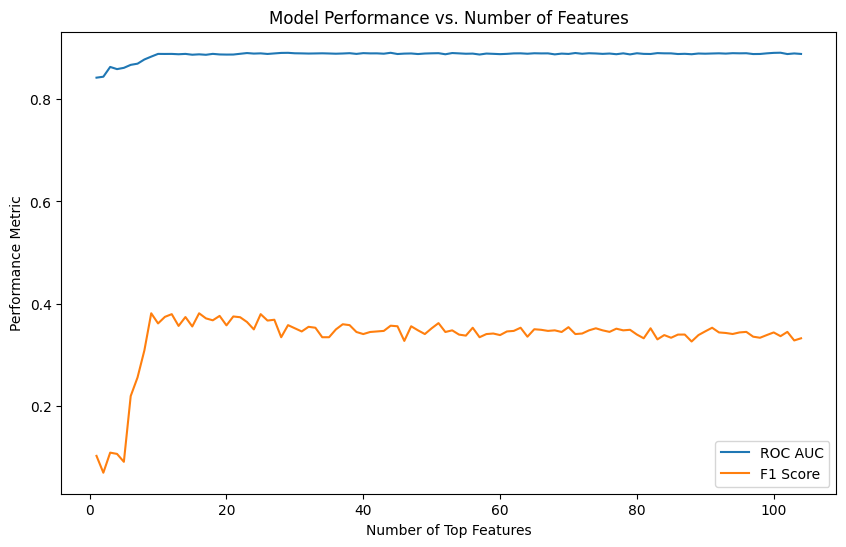

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(reduction_results['Num_Features'], reduction_results['ROC AUC'], label='ROC AUC')
plt.plot(reduction_results['Num_Features'], reduction_results['F1 Score'], label='F1 Score')
plt.xlabel('Number of Top Features')
plt.ylabel('Performance Metric')
plt.title('Model Performance vs. Number of Features')
plt.legend()
plt.show()


## 17. Describing the Added Value of the Final Model in Practice


The dataset is highly imbalanced, with approximately 15% Credit Card Users (747 out of 4,962) and 85% non-Credit Card Users (4,215 out of 4,962).

### Performance Metrics
ROC AUC (0.891):
A random model would have an ROC AUC of 0.5, whereas our model achieves a score of 0.891, demonstrating a strong ability to rank and differentiate between users.

Precision (30.4%):
When the model predicts that a user will get a credit card, it is correct approximately 30.4% of the time. By comparison, random predictions would have a precision of around 15%.

Recall (39.1%):
The model successfully identifies approximately 39.1% of the actual Credit Card Users. Random predictions, in contrast, would result in a recall of around 15%.

### Conclusion
The model adds significant value by outperforming random guessing and majority-class predictions in both identifying and targeting Credit Card Users. Its high ROC AUC score reflects a strong ability to rank and distinguish users effectively, making it a valuable tool for decision-making and strategy.